# Italian work risk

This project aims to analyse the current condition of occupation in Italy, with a particular atention to the risk of injury and mortality. We observe the variation of the ocupation related with different laws? and the mortality per region? 

## source of data

The two (three?) primary sources of our data are: 

- ISTAT Open Data
- INAIL Open Data
- Robe di Akomantoso???

### ISTAT data

data coming from ISTAT datasets are:
- occupation
- regular and not regular occupation (per year)
- not regular occupation (per field of occupation)

### INAIL data
data coming from INAIL datasets are:

- semester data per region about injuries.

# 1 Dati INAIL

In [1]:
import os
import zipfile
import pandas as pd

# Define the folder containing the zip files
folder_path = 'dati-inail'

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Get the list of files in the zip archive
            zip_contents = zip_ref.namelist()
            
            # Assume there is only one CSV file per zip archive
            csv_file_name = zip_contents[0]
            
            # Extract the CSV file to a file-like object
            with zip_ref.open(csv_file_name) as csv_file:
                try:
                    # Attempt to read the CSV file using UTF-8 encoding
                    df = pd.read_csv(csv_file, encoding='utf-8', sep=';')
                except UnicodeDecodeError:
                    # If UTF-8 fails, try reading with ISO-8859-1 encoding
                    csv_file.seek(0)  # Reset file pointer to the beginning
                    df = pd.read_csv(csv_file, encoding='ISO-8859-1', sep=';')
                
                # Add the DataFrame to the list
                dataframes.append(df)



C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3597711007.py:29: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding='utf-8', sep=';')


In [2]:
dataframes[1]

,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,IdentificativoInfortunato,Genere,Eta,LuogoNascita,...,Indennizzo,DecisioneIstruttoriaEsitoMortale,GradoMenomazione,GiorniIndennizzati,IdentificativoDatoreLavoro,PosizioneAssicurativaTerritoriale,SettoreAttivitaEconomica,Gestione,GestioneTariffaria,GrandeGruppoTariffario
0,31/10/2023,21/12/2018,20/12/2018,08/01/2019,NaN,77,10455636,M,48,ITAL,...,TE,ND,-1,3,-1,-1,ND,A,ND,ND
1,31/10/2023,12/01/2022,05/01/2022,02/05/2022,NaN,76,18146446,M,61,ITAL,...,NE,ND,-1,0,5826271,3456738,H 53,I,4,0
2,31/10/2023,01/02/2022,31/01/2022,10/02/2022,NaN,77,3902117,F,28,ITAL,...,TE,ND,-1,3,7444146,9293637,I 56,I,3,0
3,31/10/2023,30/01/2020,29/01/2020,01/04/2020,NaN,76,8248159,M,58,ITAL,...,NE,ND,-1,0,-1,-1,ND,I,ND,ND
4,31/10/2023,21/11/2022,18/11/2022,29/12/2022,NaN,76,18307499,M,70,ITAL,...,NE,ND,-1,0,-1,-1,ND,I,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836,31/10/2023,04/03/2019,01/03/2019,22/03/2019,NaN,76,14495991,F,16,ITAL,...,NE,ND,-1,0,-1,-1,ND,S,ND,ND
21837,31/10/2023,14/07/2022,11/07/2022,21/09/2022,NaN,77,14523933,F,58,ITAL,...,NE,ND,-1,0,5826271,3456736,H 53,I,4,0
21838,31/10/2023,17/06/2022,12/06/2022,21/07/2022,NaN,76,32906398,M,62,ITAL,...,TE,ND,-1,21,-1,-1,ND,A,ND,ND
21839,31/10/2023,28/04/2020,06/03/2020,21/10/2020,NaN,76,32907400,F,52,ITAL,...,NE,ND,-1,0,-1,-1,ND,S,ND,ND


In [3]:
# List of region names
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'EmiliaRomagna', 'FriuliVeneziaGiulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sicilia', 'Toscana', 'TrentinoAltoAdige', 'Umbria', 'Valledaosta', 'Veneto']

# Create the dictionary associating each DataFrame with a region name
regions_dfs = dict(zip(regions, dataframes))

# # Print the keys and the first few rows of the DataFrames for verification
# for region, df in dataframes_dict.items():
#     print(f"Region: {region}")
#     print(df.head())
#     print()

Proviamo a sciogliere tutte ste merda di sigle:
- LuogoAccadimento: da Provincia.csv colonna Provincia (considera che in questo file ha sempre tre cifre) => sostituire con DescrProvincia
- IdentificativoInfortunato: rimane così: anonmimato
- LuogoNascita: da LuogoNascita.csv colonna LuogoNascita => sostitutire con DescrNazioneNascita
- SettoreAttivitaEconomica : da SettoreAttivitaEconomica colonna SettoreAttivitaEconomica => sostituire con DescrAteco

In [4]:
# Define the folder containing the files
folder_path = 'dati-inail'

# Initialize a dictionary to hold the DataFrames
util_dict = {}

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        try:
            # Attempt to read the CSV file using UTF-8 encoding
            df = pd.read_csv(file_path, encoding='utf-8', sep=';')
        except UnicodeDecodeError:
            # If UTF-8 fails, try reading with ISO-8859-1 encoding
            df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')
        
        # Use the CSV file name without extension as the key
        key_name = os.path.splitext(file_name)[0]
        util_dict[key_name] = df

In [5]:
util_dict['Provincia']

,Provincia,CodSiglaProvincia,DescrProvincia,CodCittaMetropolitana,CodRegione,DescrRegione,CodMacroregione,DescrMacroregione,CodNazione,DescrNazione,DataInizioValidita,DataFineValidita
0,-1,-1,Non Determinato,-1,-1,Non Determinato,-1,Non Determinato,-1,Non determinato,18/03/1861,31/12/9999
1,1,TO,Torino,201,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
2,2,VC,Vercelli,0,1,Piemonte,1,Nord - Ovest,IT,Italia,12/01/1927,31/12/9999
3,3,NO,Novara,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
4,4,CN,Cuneo,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,BT,Barletta-Andria-Trani,0,16,Puglia,4,Sud,IT,Italia,27/07/2009,31/12/9999
111,111,SU,Sud Sardegna,0,20,Sardegna,5,Isole,IT,Italia,01/01/2017,31/12/9999
112,701,FU,Fiume,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947
113,702,PL,Pola,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947


In [6]:
# Get the Provincia DataFrame from util_dict
to_add = [util_dict['Provincia'], util_dict['LuogoNascita'], util_dict['SettoreAttivitaEconomica'], util_dict['DecisioneIstruttoriaEsitoMortale']]

# Initialize a dictionary to hold the merged DataFrames
merged_dfs = {}

# Iterate over each DataFrame in regions_dfs
for region, df in regions_dfs.items():
    # Create a copy of the DataFrame
    df_copy = df.copy()

    #add Provincia    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[0], left_on='LuogoAccadimento', right_on='Provincia', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrProvincia'] = merged_df['DescrProvincia']
    df_copy['DescrRegione'] = merged_df['DescrRegione']


    #add LuogoNascita    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[1], left_on='LuogoNascita', right_on='LuogoNascita', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrNazioneNascita'] = merged_df['DescrNazioneNascita']

    #add SettoreAttivitaEconomica    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[2], left_on='SettoreAttivitaEconomica', right_on='SettoreAttivitaEconomica', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrAtecoLiv1'] = merged_df['DescrAtecoLiv1']

    #add SettoreAttivitaEconomica    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[3], left_on='DecisioneIstruttoriaEsitoMortale', right_on='DecisioneIstruttoriaEsitoMortale', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrDecisioneIstruttoriaEsitoMortale'] = merged_df['DescrDecisioneIstruttoriaEsitoMortale']


    
    # Store the modified DataFrame in the merged_dfs dictionary
    merged_dfs[region] = df_copy




In [7]:
merged_dfs['Abruzzo']

,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,IdentificativoInfortunato,Genere,Eta,LuogoNascita,...,PosizioneAssicurativaTerritoriale,SettoreAttivitaEconomica,Gestione,GestioneTariffaria,GrandeGruppoTariffario,DescrProvincia,DescrRegione,DescrNazioneNascita,DescrAtecoLiv1,DescrDecisioneIstruttoriaEsitoMortale
0,31/10/2023,20/09/2019,18/09/2019,09/03/2020,NaN,67,553058,M,50,ITAL,...,2290252,C 22,I,1,2,Teramo,Abruzzo,ITALIA,Attivita' manifatturiere,Non Applicabile
1,31/10/2023,07/07/2020,03/07/2020,28/07/2020,NaN,68,17888326,M,57,ITAL,...,2177276,F 43,I,2,3,Pescara,Abruzzo,ITALIA,Costruzioni,Non Applicabile
2,31/10/2023,02/03/2022,19/02/2022,25/03/2022,NaN,67,3902254,M,59,ITAL,...,9300630,G 47,I,3,0,Teramo,Abruzzo,ITALIA,"Commercio all'ingrosso e al dettaglio, riparaz...",Non Applicabile
3,31/10/2023,24/05/2022,23/05/2022,15/06/2022,NaN,66,3749374,M,48,ITAL,...,2996390,F 41,I,2,3,L'Aquila,Abruzzo,ITALIA,Costruzioni,Non Applicabile
4,31/10/2023,31/12/2021,30/12/2021,20/01/2022,NaN,69,8540763,M,26,ITAL,...,13125854,Q 86,I,4,0,Chieti,Abruzzo,ITALIA,Sanita' e assistenza sociale,Non Applicabile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65830,31/10/2023,05/02/2020,04/02/2020,13/03/2020,NaN,69,340481,M,47,ITAL,...,13125878,C 20,I,1,2,Chieti,Abruzzo,ITALIA,Attivita' manifatturiere,Non Applicabile
65831,31/10/2023,04/03/2019,23/02/2019,21/03/2019,NaN,66,14494955,M,45,ITAL,...,-1,ND,I,ND,ND,L'Aquila,Abruzzo,ITALIA,Non determinato,Non Applicabile
65832,31/10/2023,06/06/2018,04/06/2018,12/07/2018,NaN,69,7558726,M,42,ITAL,...,2169895,C 17,I,1,2,Chieti,Abruzzo,ITALIA,Attivita' manifatturiere,Non Applicabile
65833,31/10/2023,10/05/2021,06/05/2021,10/05/2021,NaN,67,33162630,M,17,ITAL,...,-1,ND,S,ND,ND,Teramo,Abruzzo,ITALIA,Non determinato,Non Applicabile


In [8]:
# Define the required columns
required_columns = [
    'DataRilevazione', 'DataProtocollo', 'DataAccadimento', 'DataDefinizione',
    'DataMorte', 'LuogoAccadimento', 'DescrProvincia', 'DescrRegione', 'IdentificativoInfortunato', 'Genere',
    'Eta', 'LuogoNascita', 'DescrNazioneNascita', 'IdentificativoCaso', 'DecisioneIstruttoriaEsitoMortale', 'DescrDecisioneIstruttoriaEsitoMortale',
    'GradoMenomazione', 'IdentificativoDatoreLavoro', 'SettoreAttivitaEconomica', 'DescrAtecoLiv1'
]


# Initialize a dictionary to hold the filtered DataFrames
filtered_dfs = {}

# Select only the required columns for each DataFrame in merged_dfs
for region, df in merged_dfs.items():
    filtered_df = df[required_columns]
    filtered_dfs[region] = filtered_df

    



In [9]:
filtered_dfs['Abruzzo']

,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,DescrRegione,IdentificativoInfortunato,Genere,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1
0,31/10/2023,20/09/2019,18/09/2019,09/03/2020,NaN,67,Teramo,Abruzzo,553058,M,50,ITAL,ITALIA,22509749,ND,Non Applicabile,-1,3556168,C 22,Attivita' manifatturiere
1,31/10/2023,07/07/2020,03/07/2020,28/07/2020,NaN,68,Pescara,Abruzzo,17888326,M,57,ITAL,ITALIA,23029158,ND,Non Applicabile,-1,544459,F 43,Costruzioni
2,31/10/2023,02/03/2022,19/02/2022,25/03/2022,NaN,67,Teramo,Abruzzo,3902254,M,59,ITAL,ITALIA,24151604,ND,Non Applicabile,-1,7446105,G 47,"Commercio all'ingrosso e al dettaglio, riparaz..."
3,31/10/2023,24/05/2022,23/05/2022,15/06/2022,NaN,66,L'Aquila,Abruzzo,3749374,M,48,ITAL,ITALIA,24301015,ND,Non Applicabile,-1,2673133,F 41,Costruzioni
4,31/10/2023,31/12/2021,30/12/2021,20/01/2022,NaN,69,Chieti,Abruzzo,8540763,M,26,ITAL,ITALIA,23949261,ND,Non Applicabile,-1,4173909,Q 86,Sanita' e assistenza sociale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65830,31/10/2023,05/02/2020,04/02/2020,13/03/2020,NaN,69,Chieti,Abruzzo,340481,M,47,ITAL,ITALIA,22824554,ND,Non Applicabile,13,3216578,C 20,Attivita' manifatturiere
65831,31/10/2023,04/03/2019,23/02/2019,21/03/2019,NaN,66,L'Aquila,Abruzzo,14494955,M,45,ITAL,ITALIA,22126488,ND,Non Applicabile,-1,-1,ND,Non determinato
65832,31/10/2023,06/06/2018,04/06/2018,12/07/2018,NaN,69,Chieti,Abruzzo,7558726,M,42,ITAL,ITALIA,21604368,ND,Non Applicabile,9,3936990,C 17,Attivita' manifatturiere
65833,31/10/2023,10/05/2021,06/05/2021,10/05/2021,NaN,67,Teramo,Abruzzo,33162630,M,17,ITAL,ITALIA,23605125,ND,Non Applicabile,-1,-1,ND,Non determinato


In [10]:
date_columns = ['DataRilevazione', 'DataProtocollo', 'DataAccadimento', 'DataDefinizione', 'DataMorte']
date_format = '%d/%m/%Y'

for df_name, df in filtered_dfs.items():
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')

C:\Users\danie\AppData\Local\Temp\ipykernel_2824\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_2824\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_2824\2946744860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [11]:
# Concatenate all DataFrames in filtered_dfs into one DataFrame
concatenated_df_20 = pd.concat(filtered_dfs.values(), ignore_index=True)

In [13]:
concatenated_df_20

,DataRilevazione,DataProtocollo,DataAccadimento,DataDefinizione,DataMorte,LuogoAccadimento,DescrProvincia,DescrRegione,IdentificativoInfortunato,Genere,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,DecisioneIstruttoriaEsitoMortale,DescrDecisioneIstruttoriaEsitoMortale,GradoMenomazione,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1
0,2023-10-31,2019-09-20,2019-09-18,2020-03-09,NaN,67,Teramo,Abruzzo,553058,M,50,ITAL,ITALIA,22509749,ND,Non Applicabile,-1,3556168,C 22,Attivita' manifatturiere
1,2023-10-31,2020-07-07,2020-07-03,2020-07-28,NaN,68,Pescara,Abruzzo,17888326,M,57,ITAL,ITALIA,23029158,ND,Non Applicabile,-1,544459,F 43,Costruzioni
2,2023-10-31,2022-03-02,2022-02-19,2022-03-25,NaN,67,Teramo,Abruzzo,3902254,M,59,ITAL,ITALIA,24151604,ND,Non Applicabile,-1,7446105,G 47,"Commercio all'ingrosso e al dettaglio, riparaz..."
3,2023-10-31,2022-05-24,2022-05-23,2022-06-15,NaN,66,L'Aquila,Abruzzo,3749374,M,48,ITAL,ITALIA,24301015,ND,Non Applicabile,-1,2673133,F 41,Costruzioni
4,2023-10-31,2021-12-31,2021-12-30,2022-01-20,NaN,69,Chieti,Abruzzo,8540763,M,26,ITAL,ITALIA,23949261,ND,Non Applicabile,-1,4173909,Q 86,Sanita' e assistenza sociale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065938,2023-10-31,2018-05-18,2018-05-15,2018-06-07,NaN,23,Verona,Veneto,7548099,M,27,Z100,ALBANIA,21555041,ND,Non Applicabile,-1,4454317,G 47,"Commercio all'ingrosso e al dettaglio, riparaz..."
3065939,2023-10-31,2021-05-10,2021-05-06,2021-05-10,NaN,26,Treviso,Veneto,33162720,F,29,ITAL,ITALIA,23598166,ND,Non Applicabile,-1,-1,ND,Non determinato
3065940,2023-10-31,2020-05-05,2020-05-04,2020-05-05,NaN,27,Venezia,Veneto,32910525,M,27,ITAL,ITALIA,22962023,ND,Non Applicabile,-1,-1,ND,Non determinato
3065941,2023-10-31,2021-05-10,2021-05-05,2021-06-16,NaN,27,Venezia,Veneto,33162639,F,13,Z140,MOLDAVIA,23619740,ND,Non Applicabile,-1,-1,ND,Non determinato


In [12]:

# Define the mapping for MacroRegione
macroregione_mapping = {
    "Valle D'Aosta": 'NordOvest',
    'Piemonte': 'NordOvest',
    'Liguria': 'NordOvest',
    'Lombardia': 'NordOvest',
    'Veneto': 'NordEst',
    'Trentino Alto Adige': 'NordEst',
    'Friuli Venezia Giulia': 'NordEst',
    'Emilia Romagna': 'NordEst',
    'Toscana': 'Centro',
    'Lazio': 'Centro',
    'Umbria': 'Centro',
    'Marche': 'Centro',
    'Puglia': 'Sud',
    'Campania': 'Sud',
    'Calabria': 'Sud',
    'Basilicata': 'Sud',
    'Abruzzo': 'Sud',
    'Molise': 'Sud',
    'Sicilia': 'Sud'
}

# Add the MacroRegione column to concatenated_df
concatenated_df_20['MacroRegione'] = concatenated_df_20['DescrRegione'].map(macroregione_mapping)

# Reorder columns to have 'Regione' and 'MacroRegione' at the beginning
final_columns = ['DescrRegione', 'MacroRegione'] + [col for col in required_columns if col != 'Regione']
concatenated_df = concatenated_df_20[final_columns]

# Dati 2023-2024

In [13]:
import os
import zipfile
import pandas as pd

# Define the folder containing the zip files
folder_path = 'dati-inail/23-24'

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Get the list of files in the zip archive
            zip_contents = zip_ref.namelist()
            
            # Assume there is only one CSV file per zip archive
            csv_file_name = zip_contents[0]
            
            # Extract the CSV file to a file-like object
            with zip_ref.open(csv_file_name) as csv_file:
                try:
                    # Attempt to read the CSV file using UTF-8 encoding
                    df = pd.read_csv(csv_file, encoding='utf-8', sep=';')
                except UnicodeDecodeError:
                    # If UTF-8 fails, try reading with ISO-8859-1 encoding
                    csv_file.seek(0)  # Reset file pointer to the beginning
                    df = pd.read_csv(csv_file, encoding='ISO-8859-1', sep=';')
                
                # Add the DataFrame to the list
                dataframes.append(df)
                dataframes = dataframes



In [14]:
dataframes[1]

,DataRilevazione,DataProtocollo,DataAccadimento,DataMorte,LuogoAccadimento,IdentificativoInfortunato,Genere,Eta,LuogoNascita,ModalitaAccadimento,ConSenzaMezzoTrasporto,IdentificativoCaso,IdentificativoDatoreLavoro,PosizioneAssicurativaTerritoriale,SettoreAttivitaEconomica,Gestione,GestioneTariffaria,GrandeGruppoTariffario
0,31/05/2024,20/05/2024,16/05/2024,NaN,77,34071802,F,55,ITAL,N,N,25700735,-1,-1,ND,S,ND,ND
1,31/05/2024,22/01/2024,20/01/2024,NaN,76,6342019,F,55,ITAL,S,N,25457337,5772377,6645843,O 84,I,4,0
2,31/05/2024,08/04/2024,06/04/2024,NaN,76,34034703,M,11,ITAL,N,N,25636837,-1,-1,ND,S,ND,ND
3,31/05/2024,08/04/2024,06/04/2024,NaN,76,34034132,F,53,Z129,N,N,25632606,-1,-1,ND,A,ND,ND
4,31/05/2024,21/02/2024,19/02/2024,NaN,77,14338767,M,66,ITAL,N,N,25525999,7407046,9202194,I 55,I,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,31/05/2024,14/03/2024,27/02/2024,NaN,77,34013713,F,59,ITAL,N,N,25580008,-1,-1,ND,S,ND,ND
3349,31/05/2024,12/03/2024,09/03/2024,NaN,76,34011323,M,13,ITAL,N,N,25577620,-1,-1,ND,S,ND,ND
3350,31/05/2024,30/01/2024,29/01/2024,NaN,76,33972916,M,12,ITAL,N,N,25463008,-1,-1,ND,S,ND,ND
3351,31/05/2024,28/05/2024,25/05/2024,NaN,76,34081010,F,29,ITAL,N,N,25697842,-1,-1,ND,I,ND,ND


In [15]:
# List of region names
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'EmiliaRomagna', 'FriuliVeneziaGiulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sicilia', 'Toscana', 'TrentinoAltoAdige', 'Umbria', 'Valledaosta', 'Veneto']

# Create the dictionary associating each DataFrame with a region name
regions_dfs = dict(zip(regions, dataframes))

# # Print the keys and the first few rows of the DataFrames for verification
# for region, df in dataframes_dict.items():
#     print(f"Region: {region}")
#     print(df.head())
#     print()

In [16]:
# Define the folder containing the files
folder_path = 'dati-inail'

# Initialize a dictionary to hold the DataFrames
util_dict = {}

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        try:
            # Attempt to read the CSV file using UTF-8 encoding
            df = pd.read_csv(file_path, encoding='utf-8', sep=';')
        except UnicodeDecodeError:
            # If UTF-8 fails, try reading with ISO-8859-1 encoding
            df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')
        
        # Use the CSV file name without extension as the key
        key_name = os.path.splitext(file_name)[0]
        util_dict[key_name] = df
        util_dict = util_dict

In [17]:
util_dict['Provincia']

,Provincia,CodSiglaProvincia,DescrProvincia,CodCittaMetropolitana,CodRegione,DescrRegione,CodMacroregione,DescrMacroregione,CodNazione,DescrNazione,DataInizioValidita,DataFineValidita
0,-1,-1,Non Determinato,-1,-1,Non Determinato,-1,Non Determinato,-1,Non determinato,18/03/1861,31/12/9999
1,1,TO,Torino,201,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
2,2,VC,Vercelli,0,1,Piemonte,1,Nord - Ovest,IT,Italia,12/01/1927,31/12/9999
3,3,NO,Novara,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
4,4,CN,Cuneo,0,1,Piemonte,1,Nord - Ovest,IT,Italia,18/03/1861,31/12/9999
...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,BT,Barletta-Andria-Trani,0,16,Puglia,4,Sud,IT,Italia,27/07/2009,31/12/9999
111,111,SU,Sud Sardegna,0,20,Sardegna,5,Isole,IT,Italia,01/01/2017,31/12/9999
112,701,FU,Fiume,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947
113,702,PL,Pola,0,6,Friuli Venezia Giulia,2,Nord - Est,IT,Italia,27/01/1924,10/02/1947


In [18]:
# Get the Provincia DataFrame from util_dict
to_add = [util_dict['Provincia'], util_dict['LuogoNascita'], util_dict['SettoreAttivitaEconomica']]

# Initialize a dictionary to hold the merged DataFrames
merged_dfs = {}

# Iterate over each DataFrame in regions_dfs
for region, df in regions_dfs.items():
    # Create a copy of the DataFrame
    df_copy = df.copy()

    #add Provincia    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[0], left_on='LuogoAccadimento', right_on='Provincia', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrProvincia'] = merged_df['DescrProvincia']
    df_copy['DescrRegione'] = merged_df['DescrRegione']


    #add LuogoNascita    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[1], left_on='LuogoNascita', right_on='LuogoNascita', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrNazioneNascita'] = merged_df['DescrNazioneNascita']

    #add SettoreAttivitaEconomica    
    # Merge with provincia_df on the specified columns
    merged_df = pd.merge(df_copy, to_add[2], left_on='SettoreAttivitaEconomica', right_on='SettoreAttivitaEconomica', how='left')
    # Add only the DescrProvincia column to the original DataFrame copy
    df_copy['DescrAtecoLiv1'] = merged_df['DescrAtecoLiv1']
    
    # Store the modified DataFrame in the merged_dfs dictionary
    merged_dfs[region] = df_copy




In [19]:
merged_dfs['Abruzzo']

,DataRilevazione,DataProtocollo,DataAccadimento,DataMorte,LuogoAccadimento,IdentificativoInfortunato,Genere,Eta,LuogoNascita,ModalitaAccadimento,...,IdentificativoDatoreLavoro,PosizioneAssicurativaTerritoriale,SettoreAttivitaEconomica,Gestione,GestioneTariffaria,GrandeGruppoTariffario,DescrProvincia,DescrRegione,DescrNazioneNascita,DescrAtecoLiv1
0,31/05/2024,01/03/2024,26/02/2024,NaN,66,34002556,M,11,ITAL,N,...,-1,-1,ND,S,ND,ND,L'Aquila,Abruzzo,ITALIA,Non determinato
1,31/05/2024,12/01/2024,11/01/2024,NaN,66,33956943,M,33,ITAL,N,...,-1,-1,ND,S,ND,ND,L'Aquila,Abruzzo,ITALIA,Non determinato
2,31/05/2024,19/02/2024,16/02/2024,NaN,69,33990742,F,16,ITAL,N,...,-1,-1,ND,S,ND,ND,Chieti,Abruzzo,ITALIA,Non determinato
3,31/05/2024,04/03/2024,29/02/2024,NaN,67,34003949,M,14,ITAL,N,...,-1,-1,ND,S,ND,ND,Teramo,Abruzzo,ITALIA,Non determinato
4,31/05/2024,19/03/2024,18/03/2024,NaN,67,33979791,M,47,Z148,N,...,6975147,8643944,F 43,I,1,3,Teramo,Abruzzo,MACEDONIA,Costruzioni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726,31/05/2024,13/02/2024,09/02/2024,NaN,67,33985477,F,9,ITAL,N,...,-1,-1,ND,S,ND,ND,Teramo,Abruzzo,ITALIA,Non determinato
9727,31/05/2024,10/05/2024,09/05/2024,NaN,69,34063130,F,56,ITAL,S,...,-1,-1,ND,I,ND,ND,Chieti,Abruzzo,ITALIA,Non determinato
9728,31/05/2024,28/05/2024,24/05/2024,NaN,67,26982756,M,51,ITAL,N,...,3524818,14035982,C 20,I,1,2,Teramo,Abruzzo,ITALIA,Attivita' manifatturiere
9729,31/05/2024,19/03/2024,15/03/2024,NaN,68,1483933,F,49,ITAL,N,...,11230148,14231587,C 14,I,1,8,Pescara,Abruzzo,ITALIA,Attivita' manifatturiere


In [20]:
# Define the required columns
required_columns = [
    'DataRilevazione', 'DataProtocollo', 'DataAccadimento',
    'DataMorte', 'LuogoAccadimento', 'DescrProvincia', 'DescrRegione', 'IdentificativoInfortunato', 'Genere',
    'Eta', 'LuogoNascita', 'DescrNazioneNascita', 'IdentificativoCaso',
    'IdentificativoDatoreLavoro', 'SettoreAttivitaEconomica', 'DescrAtecoLiv1'
]
#  'DecisioneIstruttoriaEsitoMortale', 'DescrDecisioneIstruttoriaEsitoMortale', 'DataDefinizione', 'GradoMenomazione', 

# Initialize a dictionary to hold the filtered DataFrames
filtered_dfs = {}

# Select only the required columns for each DataFrame in merged_dfs
for region, df in merged_dfs.items():
    filtered_df = df[required_columns]
    filtered_dfs[region] = filtered_df

    



In [21]:
filtered_dfs['Abruzzo']

,DataRilevazione,DataProtocollo,DataAccadimento,DataMorte,LuogoAccadimento,DescrProvincia,DescrRegione,IdentificativoInfortunato,Genere,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1
0,31/05/2024,01/03/2024,26/02/2024,NaN,66,L'Aquila,Abruzzo,34002556,M,11,ITAL,ITALIA,25573067,-1,ND,Non determinato
1,31/05/2024,12/01/2024,11/01/2024,NaN,66,L'Aquila,Abruzzo,33956943,M,33,ITAL,ITALIA,25461964,-1,ND,Non determinato
2,31/05/2024,19/02/2024,16/02/2024,NaN,69,Chieti,Abruzzo,33990742,F,16,ITAL,ITALIA,25531985,-1,ND,Non determinato
3,31/05/2024,04/03/2024,29/02/2024,NaN,67,Teramo,Abruzzo,34003949,M,14,ITAL,ITALIA,25585664,-1,ND,Non determinato
4,31/05/2024,19/03/2024,18/03/2024,NaN,67,Teramo,Abruzzo,33979791,M,47,Z148,MACEDONIA,25585911,6975147,F 43,Costruzioni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726,31/05/2024,13/02/2024,09/02/2024,NaN,67,Teramo,Abruzzo,33985477,F,9,ITAL,ITALIA,25531541,-1,ND,Non determinato
9727,31/05/2024,10/05/2024,09/05/2024,NaN,69,Chieti,Abruzzo,34063130,F,56,ITAL,ITALIA,25729371,-1,ND,Non determinato
9728,31/05/2024,28/05/2024,24/05/2024,NaN,67,Teramo,Abruzzo,26982756,M,51,ITAL,ITALIA,25760672,3524818,C 20,Attivita' manifatturiere
9729,31/05/2024,19/03/2024,15/03/2024,NaN,68,Pescara,Abruzzo,1483933,F,49,ITAL,ITALIA,25610665,11230148,C 14,Attivita' manifatturiere


In [22]:
date_columns = ['DataRilevazione', 'DataProtocollo', 'DataAccadimento', 'DataMorte']
date_format = '%d/%m/%Y'
# date_format_2 = '%Y/'

for df_name, df in filtered_dfs.items():
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')

C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3086750320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3086750320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], format=date_format).dt.strftime('%Y-%m-%d')
C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3086750320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [23]:
# Concatenate all DataFrames in filtered_dfs into one DataFrame
concatenated_df_23 = pd.concat(filtered_dfs.values(), ignore_index=True)


In [24]:

# Define the mapping for MacroRegione
macroregione_mapping = {
    "Valle D'Aosta": 'NordOvest',
    'Piemonte': 'NordOvest',
    'Liguria': 'NordOvest',
    'Lombardia': 'NordOvest',
    'Veneto': 'NordEst',
    'Trentino Alto Adige': 'NordEst',
    'Friuli Venezia Giulia': 'NordEst',
    'Emilia Romagna': 'NordEst',
    'Toscana': 'Centro',
    'Lazio': 'Centro',
    'Umbria': 'Centro',
    'Marche': 'Centro',
    'Puglia': 'Sud',
    'Campania': 'Sud',
    'Calabria': 'Sud',
    'Basilicata': 'Sud',
    'Abruzzo': 'Sud',
    'Molise': 'Sud',
    'Sicilia': 'Sud'
}

# Add the MacroRegione column to concatenated_df
concatenated_df_23['MacroRegione'] = concatenated_df_23['DescrRegione'].map(macroregione_mapping)

# Reorder columns to have 'Regione' and 'MacroRegione' at the beginning
final_columns = ['DescrRegione', 'MacroRegione'] + [col for col in required_columns if col != 'Regione']
concatenated_df_23 = concatenated_df_23[final_columns]

In [26]:
concatenated_df_23

,DescrRegione,MacroRegione,DataRilevazione,DataProtocollo,DataAccadimento,DataMorte,LuogoAccadimento,DescrProvincia,DescrRegione,IdentificativoInfortunato,Genere,Eta,LuogoNascita,DescrNazioneNascita,IdentificativoCaso,IdentificativoDatoreLavoro,SettoreAttivitaEconomica,DescrAtecoLiv1
0,Abruzzo,Sud,2024-05-31,2024-03-01,2024-02-26,NaN,66,L'Aquila,Abruzzo,34002556,M,11,ITAL,ITALIA,25573067,-1,ND,Non determinato
1,Abruzzo,Sud,2024-05-31,2024-01-12,2024-01-11,NaN,66,L'Aquila,Abruzzo,33956943,M,33,ITAL,ITALIA,25461964,-1,ND,Non determinato
2,Abruzzo,Sud,2024-05-31,2024-02-19,2024-02-16,NaN,69,Chieti,Abruzzo,33990742,F,16,ITAL,ITALIA,25531985,-1,ND,Non determinato
3,Abruzzo,Sud,2024-05-31,2024-03-04,2024-02-29,NaN,67,Teramo,Abruzzo,34003949,M,14,ITAL,ITALIA,25585664,-1,ND,Non determinato
4,Abruzzo,Sud,2024-05-31,2024-03-19,2024-03-18,NaN,67,Teramo,Abruzzo,33979791,M,47,Z148,MACEDONIA,25585911,6975147,F 43,Costruzioni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437434,Valle D'Aosta,NordOvest,2024-05-31,2024-04-03,2024-03-29,NaN,7,Aosta - Aoste,Valle D'Aosta,34030881,M,33,ITAL,ITALIA,25656580,465579,I 56,Attivita' dei servizi di alloggio e di ristora...
437435,Valle D'Aosta,NordOvest,2024-05-31,2024-01-08,2024-01-03,NaN,7,Aosta - Aoste,Valle D'Aosta,4967516,M,65,Z153,BOSNIA ED ERZEGOVINA,25461832,7529726,C 33,Attivita' manifatturiere
437436,Valle D'Aosta,NordOvest,2024-05-31,2024-02-28,2024-02-21,NaN,7,Aosta - Aoste,Valle D'Aosta,33999818,F,12,ITAL,ITALIA,25522852,5706432,O 84,"Amministrazione pubblica e difesa, assicurazio..."
437437,Valle D'Aosta,NordOvest,2024-05-31,2024-05-31,2024-05-24,NaN,7,Aosta - Aoste,Valle D'Aosta,33609481,F,20,Z505,DOMINICANA REPUBBLICA,25696977,-1,ND,Non determinato


In [28]:
all_columns_20 = concatenated_df_20.columns
unique_columns_20 = concatenated_df_20.columns.unique()
print(len(all_columns_20))
print(len(unique_columns_20))

21
21


In [27]:
all_columns_23 = concatenated_df_23.columns
unique_columns_23 = concatenated_df_23.columns.unique()
print(len(all_columns_23))
print(len(unique_columns_23))
all_columns_23

18
17


Index(['DescrRegione', 'MacroRegione', 'DataRilevazione', 'DataProtocollo',
       'DataAccadimento', 'DataMorte', 'LuogoAccadimento', 'DescrProvincia',
       'DescrRegione', 'IdentificativoInfortunato', 'Genere', 'Eta',
       'LuogoNascita', 'DescrNazioneNascita', 'IdentificativoCaso',
       'IdentificativoDatoreLavoro', 'SettoreAttivitaEconomica',
       'DescrAtecoLiv1'],
      dtype='object')

In [28]:
# Drop one of the duplicate 'DescrRegione' columns in concatenated_df_23
concatenated_df_23 = concatenated_df_23.loc[:, ~concatenated_df_23.columns.duplicated()]

# Ensure DataAccadimento is datetime
concatenated_df_20['DataAccadimento'] = pd.to_datetime(concatenated_df_20['DataAccadimento'])
concatenated_df_23['DataAccadimento'] = pd.to_datetime(concatenated_df_23['DataAccadimento'])

# Ensure unique columns in both dataframes
def make_columns_unique(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

concatenated_df_20 = make_columns_unique(concatenated_df_20)
concatenated_df_23 = make_columns_unique(concatenated_df_23)

# Get the union of all columns
all_columns = list(set(concatenated_df_20.columns).union(set(concatenated_df_23.columns)))

# Reindex both dataframes to include all columns, filling missing columns with NaN
concatenated_df_20 = concatenated_df_20.reindex(columns=all_columns)
concatenated_df_23 = concatenated_df_23.reindex(columns=all_columns)

# Concatenate the dataframes
concatenated_df = pd.concat([concatenated_df_20, concatenated_df_23], ignore_index=True)

# Sort by DescrRegione and DataAccadimento
concatenated_df = concatenated_df.sort_values(by=['DescrRegione', 'DataAccadimento'])

# Reorder columns to match the order in concatenated_df_20
concatenated_df = concatenated_df[concatenated_df_20.columns]

C:\Users\danie\AppData\Local\Temp\ipykernel_2824\1056711153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_df_23['DataAccadimento'] = pd.to_datetime(concatenated_df_23['DataAccadimento'])


In [29]:
# List of columns to be removed
columns_to_remove = [
    'SettoreAttivitaEconomica', 
    'LuogoNascita', 
    'DescrDecisioneIstruttoriaEsitoMortale', 
    'GradoMenomazione', 
    'DecisioneIstruttoriaEsitoMortale'
]

# Remove the specified columns from concatenated_df
concatenated_df.drop(columns=columns_to_remove, inplace=True)


## 1. Numero incidenti

In [30]:
import pandas as pd

# Assuming concatenated_df is your DataFrame containing 'DataAccadimento', 'DescrRegione', 'MacroRegione', and other columns

# Convert 'DataAccadimento' to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Verify conversion
print(concatenated_df['DataAccadimento'])

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'DescrRegione', 'MacroRegione', and 'Year', and count occurrences
injury_per_year_region = concatenated_df.groupby(['DescrRegione', 'MacroRegione', 'Year']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione
total_values = injury_per_year_region.groupby('Year').sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Append the total values row to the injury_per_year_region DataFrame
injury_per_year_region = pd.concat([injury_per_year_region, total_values], ignore_index=True)


2474      2018-01-01
6695      2018-01-01
33921     2018-01-01
41254     2018-01-01
46043     2018-01-01
             ...    
3020913   2022-12-31
3041093   2022-12-31
3055739   2022-12-31
3056978   2022-12-31
3063851   2022-12-31
Name: DataAccadimento, Length: 3503382, dtype: datetime64[ns]


In [31]:
injury_per_year_region

,DescrRegione,MacroRegione,Year,Count
0,Abruzzo,Sud,2018,13913
1,Abruzzo,Sud,2019,13384
2,Abruzzo,Sud,2020,11149
3,Abruzzo,Sud,2021,11575
4,Abruzzo,Sud,2022,15814
...,...,...,...,...
133,Total,Total,2020,560937
134,Total,Total,2021,552963
135,Total,Total,2022,689194
136,Total,Total,2023,211604


In [35]:

# Filtra le righe per l'anno 2023 e dove DescrRegione non è "Total"
filtered_df = injury_per_year_region[(injury_per_year_region['Year'] == 2023) & (injury_per_year_region['DescrRegione'] != 'Total')]

# Trova il valore massimo di Count e la corrispondente DescrRegione
max_count_row = filtered_df.loc[filtered_df['Count'].idxmax()]

In [36]:
max_count_row

DescrRegione    Lombardia
MacroRegione    NordOvest
Year                 2023
Count               47589
Name: 61, dtype: object

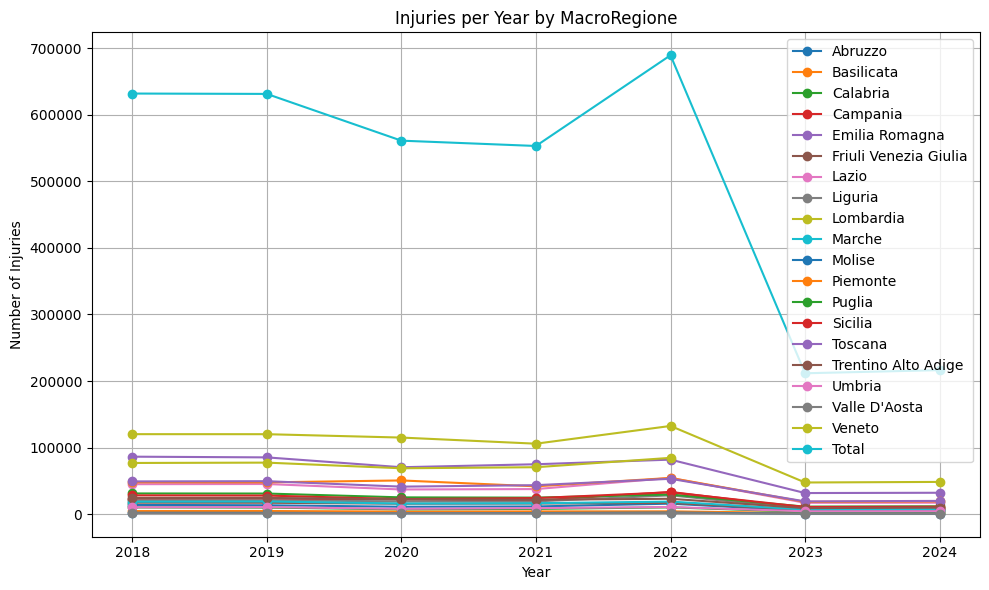

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))

# Iterate over unique MacroRegioni to plot each one
for macroregion in injury_per_year_region['DescrRegione'].unique():
    data = injury_per_year_region[injury_per_year_region['DescrRegione'] == macroregion]
    plt.plot(data['Year'], data['Count'], marker='o', linestyle='-', label=macroregion)

plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.title('Injuries per Year by MacroRegione')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Numero morti

In [38]:
deaths = concatenated_df[concatenated_df['DataMorte'].notnull()]

In [36]:
deaths

,DataDefinizione,Genere,MacroRegione,DataMorte,IdentificativoInfortunato,IdentificativoDatoreLavoro,DescrNazioneNascita,DescrProvincia,DescrRegione,DescrAtecoLiv1,DataProtocollo,Eta,DataRilevazione,IdentificativoCaso,DataAccadimento,LuogoAccadimento,Year
42989,2018-02-12,F,Sud,2018-01-02,13862163,8526303,ITALIA,Chieti,Abruzzo,"Commercio all'ingrosso e al dettaglio, riparaz...",2018-01-05,38,2023-10-31,21275880,2018-01-02,69,2018
33099,2018-02-20,M,Sud,2018-01-08,27660839,-1,ITALIA,L'Aquila,Abruzzo,Non determinato,2018-01-10,55,2023-10-31,21216326,2018-01-08,66,2018
41117,2018-03-27,M,Sud,2018-01-30,13860846,3512502,ITALIA,L'Aquila,Abruzzo,Costruzioni,2018-01-30,53,2023-10-31,21221823,2018-01-30,66,2018
35044,2018-05-03,M,Sud,2018-02-23,13928011,9474962,ITALIA,Pescara,Abruzzo,Costruzioni,2018-02-24,62,2023-10-31,21484899,2018-02-23,68,2018
49663,2018-06-01,M,Sud,2018-03-15,13950183,3260011,ITALIA,L'Aquila,Abruzzo,Attivita' manifatturiere,2018-03-16,42,2023-10-31,21360828,2018-03-15,66,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951042,2023-01-03,M,NordEst,2022-12-19,24912089,3547113,ITALIA,Vicenza,Veneto,Attivita' manifatturiere,2022-12-20,52,2023-10-31,24762236,2022-12-19,24,2022
2964502,2023-02-03,M,NordEst,2022-12-19,13046026,4708023,ITALIA,Venezia,Veneto,Attivita' manifatturiere,2022-12-22,54,2023-10-31,24765767,2022-12-19,27,2022
2860222,2023-02-07,M,NordEst,2022-12-23,9455433,1768064,ALBANIA,Verona,Veneto,Costruzioni,2022-12-27,66,2023-10-31,24774762,2022-12-23,23,2022
2765570,2023-01-23,M,NordEst,2022-12-31,9800198,4797313,ITALIA,Padova,Veneto,Attivita' manifatturiere,2023-01-02,44,2023-10-31,24808491,2022-12-28,28,2022


In [39]:

# Assuming 'deaths' is your DataFrame containing 'DataAccadimento', 'DescrRegione', 'MacroRegione', and other columns

# Convert 'DataAccadimento' to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'DescrRegione', 'MacroRegione', and 'Year', and count occurrences
deaths_year_per_region = deaths.groupby(['DescrRegione', 'MacroRegione', 'Year']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione
total_values = deaths_year_per_region.groupby('Year').sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Append the total values row to the deaths_year_per_region DataFrame
deaths_year_per_region = pd.concat([deaths_year_per_region, total_values], ignore_index=True)


C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3812055220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_2824\3812055220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [38]:
deaths_year_per_region

,DescrRegione,MacroRegione,Year,Count
0,Abruzzo,Sud,2018,30
1,Abruzzo,Sud,2019,35
2,Abruzzo,Sud,2020,46
3,Abruzzo,Sud,2021,46
4,Abruzzo,Sud,2022,25
...,...,...,...,...
132,Total,Total,2020,1689
133,Total,Total,2021,1402
134,Total,Total,2022,1216
135,Total,Total,2023,318


In [40]:
# Filtra le righe per l'anno 2023 e dove DescrRegione non è "Total"
filtered_df = deaths_year_per_region[(deaths_year_per_region['Year'] == 2023) & (deaths_year_per_region['DescrRegione'] != 'Total')]

# Trova il valore massimo di Count e la corrispondente DescrRegione
max_count_row = filtered_df.loc[filtered_df['Count'].idxmax()]

In [41]:
max_count_row

DescrRegione    Lombardia
MacroRegione    NordOvest
Year                 2023
Count                  72
Name: 61, dtype: object

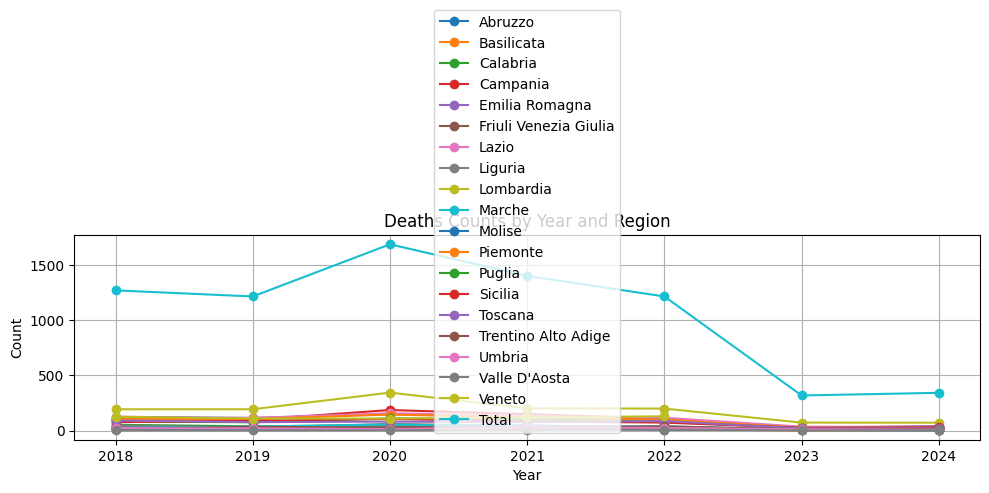

In [39]:
# Extract unique regions for plotting
regions = deaths_year_per_region['DescrRegione'].unique()

# Plotting
plt.figure(figsize=(10, 4))

# Plot each region's data
for region in regions:
    region_data = deaths_year_per_region[deaths_year_per_region['DescrRegione'] == region]
    plt.plot(region_data['Year'], region_data['Count'], marker='o', label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Deaths Counts by Year and Region')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Età per anno

### 3.1 Incidenti per età

In [40]:
import pandas as pd

# Assuming 'concatenated_df' is your DataFrame containing 'DataAccadimento', 'DescrRegione', 'MacroRegione', 'Eta', and other columns

# Convert 'DataAccadimento' to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Define a function to categorize age into groups
def categorize_age(age):
    if age < 15:
        return '0-14'
    elif 15 <= age <= 64:
        return '15-64'
    else:
        return '65+'

# Apply the function to create a new 'AgeGroup' column
concatenated_df['AgeGroup'] = concatenated_df['Eta'].apply(categorize_age)

# Group by 'DescrRegione', 'MacroRegione', 'Year', and 'AgeGroup', and count the number of events
injury_per_year_region_age = concatenated_df.groupby(['DescrRegione', 'MacroRegione', 'Year', 'AgeGroup']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and age group
total_values = injury_per_year_region_age.groupby(['Year', 'AgeGroup']).sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Calculate '15+' as the sum of '15-64' and '65+'
agegroup_15plus = injury_per_year_region_age[injury_per_year_region_age['AgeGroup'].isin(['15-64', '65+'])].copy()
agegroup_15plus['AgeGroup'] = '15+'
agegroup_15plus = agegroup_15plus.groupby(['DescrRegione', 'MacroRegione', 'Year', 'AgeGroup'])['Count'].sum().reset_index()

# Append the '15+' values to the injury_per_year_region_age DataFrame
injury_per_year_region_age = pd.concat([injury_per_year_region_age, agegroup_15plus], ignore_index=True)

# Append the total values row to the injury_per_year_region_age DataFrame
injury_per_year_region_age = pd.concat([injury_per_year_region_age, total_values], ignore_index=True)

# Calculate the total count for each year
yearly_totals = injury_per_year_region_age.groupby('Year')['Count'].sum().reset_index(name='YearlyTotal')

# Merge the total count with the original DataFrame
injury_per_year_region_age = pd.merge(injury_per_year_region_age, yearly_totals, on='Year')

# Calculate the percentage for each count
injury_per_year_region_age['Percentage'] = (injury_per_year_region_age['Count'] / injury_per_year_region_age['YearlyTotal']) * 100

# Drop the YearlyTotal column as it is no longer needed
injury_per_year_region_age.drop(columns=['YearlyTotal'], inplace=True)


In [41]:
injury_per_year_region_age

,DescrRegione,MacroRegione,Year,AgeGroup,Count,Percentage
0,Abruzzo,Sud,2018,0-14,1201,0.065336
1,Abruzzo,Sud,2018,15-64,12246,0.666202
2,Abruzzo,Sud,2018,65+,466,0.025351
3,Abruzzo,Sud,2019,0-14,1129,0.061516
4,Abruzzo,Sud,2019,15-64,11771,0.641374
...,...,...,...,...,...,...
540,Total,Total,2023,15-64,182473,29.902136
541,Total,Total,2023,65+,4553,0.746107
542,Total,Total,2024,0-14,29225,4.715155
543,Total,Total,2024,15-64,182242,29.402882


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


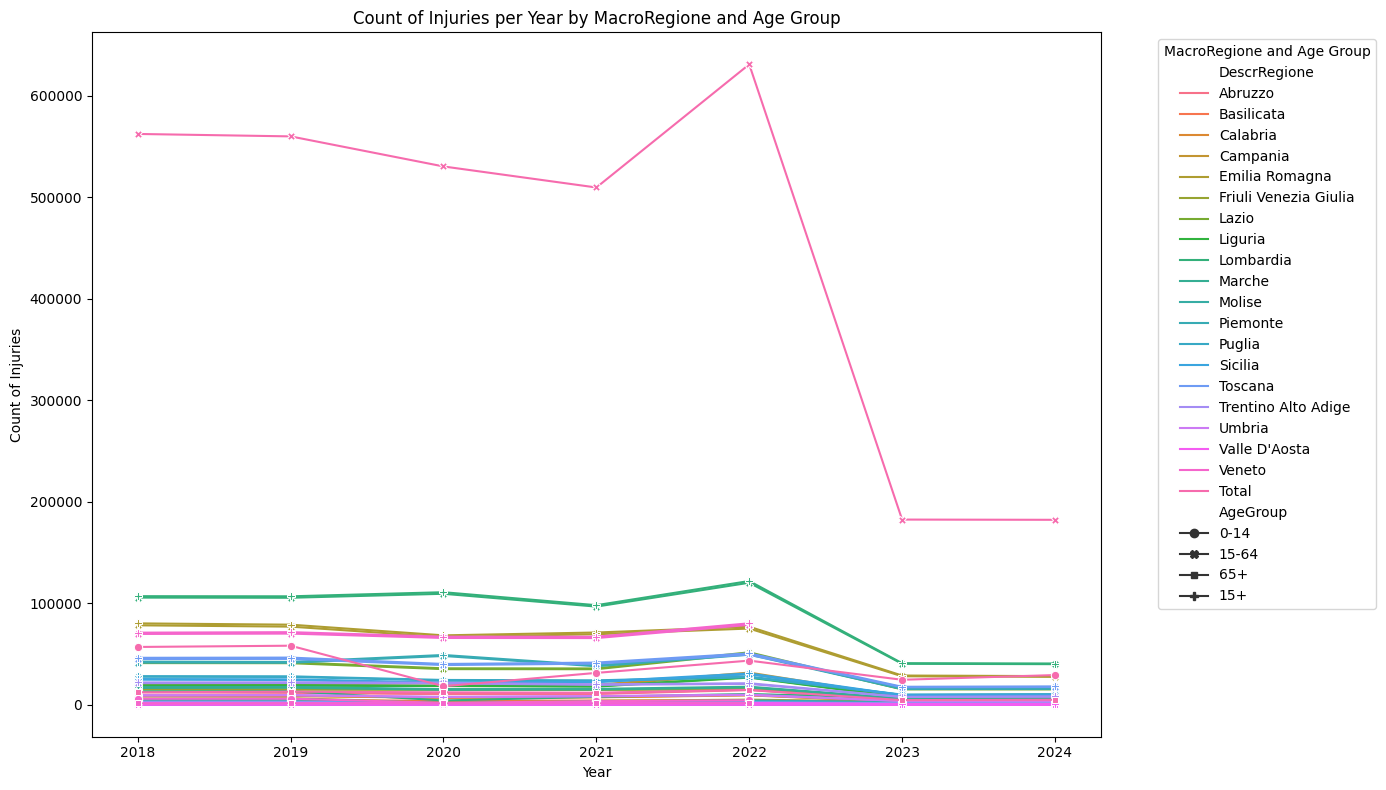

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=injury_per_year_region_age, x='Year', y='Count', hue='DescrRegione', style='AgeGroup', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Injuries per Year by MacroRegione and Age Group')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='MacroRegione and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
# Sum the values per year and age group
total_injuries_per_year_agegroup = injury_per_year_region_age.groupby(['Year', 'AgeGroup']).agg({'Count': 'sum', 'Percentage': 'sum'}).reset_index()


In [44]:
total_injuries_per_year_agegroup

,Year,AgeGroup,Count,Percentage
0,2018,0-14,113850,6.193623
1,2018,15+,574777,31.268792
2,2018,15-64,1125048,61.204419
3,2018,65+,24506,1.333166
4,2019,0-14,116322,6.338106
5,2019,15+,572986,31.220631
6,2019,15-64,1120256,61.040059
7,2019,65+,25716,1.401203
8,2020,0-14,36420,2.187912
9,2020,15+,542727,32.604029


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


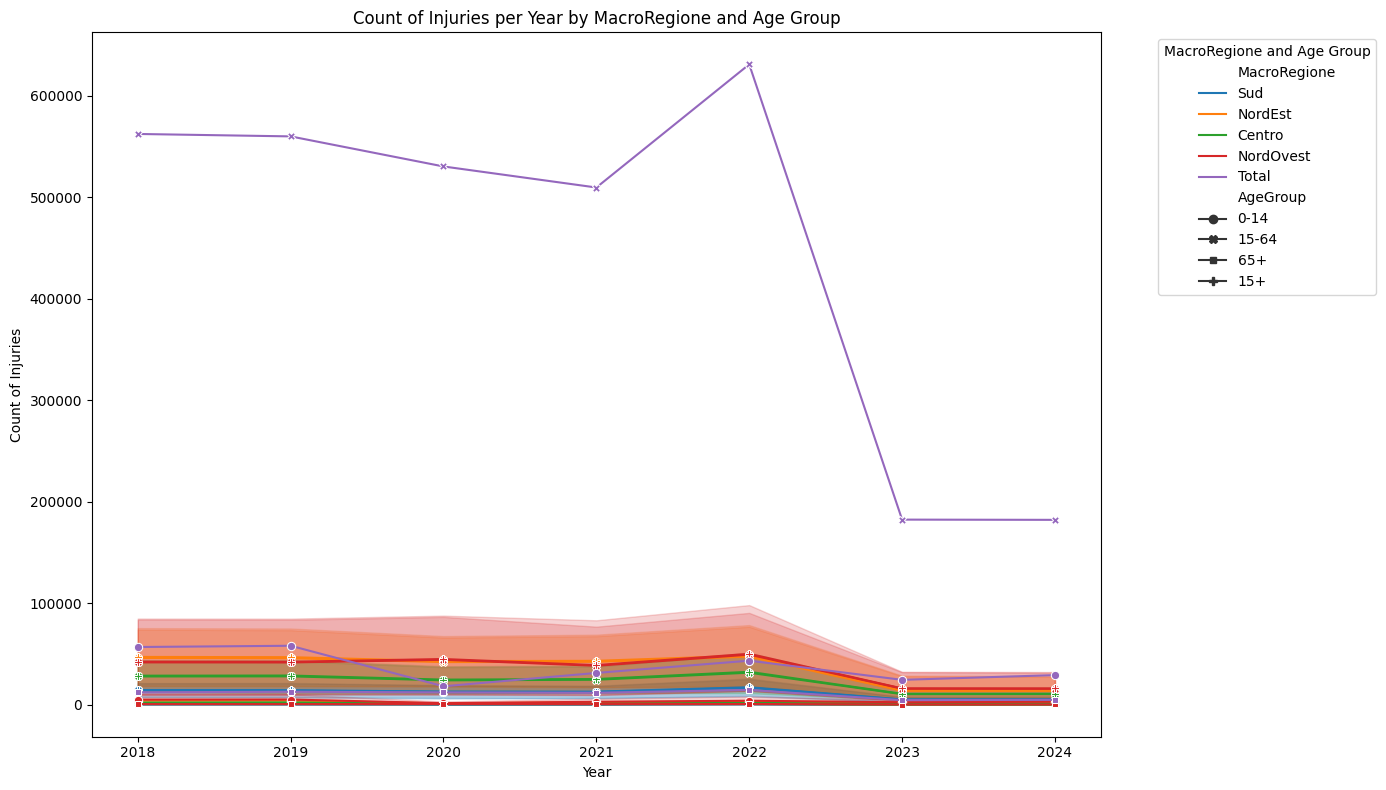

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=injury_per_year_region_age, x='Year', y='Count', hue='MacroRegione', style='AgeGroup', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Injuries per Year by MacroRegione and Age Group')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='MacroRegione and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

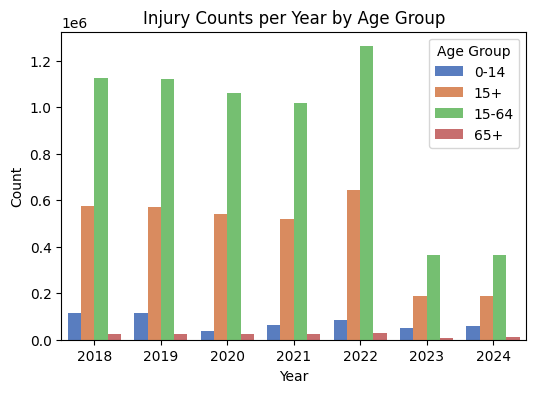

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Year', y='Count', hue='AgeGroup', data=total_injuries_per_year_agegroup, palette='muted')
plt.title('Injury Counts per Year by Age Group')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

### 2.2. Morti per età

In [47]:
import pandas as pd

# Assuming 'deaths' is your DataFrame containing 'DataAccadimento', 'DescrRegione', 'MacroRegione', 'Eta', and other columns

# Convert 'DataAccadimento' to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Define a function to categorize age into groups
def categorize_age(age):
    if age < 15:
        return '0-14'
    elif 15 <= age <= 64:
        return '15-64'
    else:
        return '65+'

# Apply the function to create a new 'AgeGroup' column
deaths['AgeGroup'] = deaths['Eta'].apply(categorize_age)

# Group by 'DescrRegione', 'MacroRegione', 'Year', and 'AgeGroup', and count the number of events
deaths_per_year_region_age = deaths.groupby(['DescrRegione', 'MacroRegione', 'Year', 'AgeGroup']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and age group
total_values = deaths_per_year_region_age.groupby(['Year', 'AgeGroup']).sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Calculate '15+' as the sum of '15-64' and '65+'
agegroup_15plus = deaths_per_year_region_age[deaths_per_year_region_age['AgeGroup'].isin(['15-64', '65+'])].copy()
agegroup_15plus['AgeGroup'] = '15+'
agegroup_15plus = agegroup_15plus.groupby(['DescrRegione', 'MacroRegione', 'Year', 'AgeGroup'])['Count'].sum().reset_index()

# Append the '15+' values to the deaths_per_year_region_age DataFrame
deaths_per_year_region_age = pd.concat([deaths_per_year_region_age, agegroup_15plus], ignore_index=True)

# Append the total values row to the deaths_per_year_region_age DataFrame
deaths_per_year_region_age = pd.concat([deaths_per_year_region_age, total_values], ignore_index=True)

# Calculate the total count for each year
yearly_totals = deaths_per_year_region_age.groupby('Year')['Count'].sum().reset_index(name='YearlyTotal')

# Merge the total count with the original DataFrame
deaths_per_year_region_age = pd.merge(deaths_per_year_region_age, yearly_totals, on='Year')

# Calculate the percentage for each count
deaths_per_year_region_age['Percentage'] = (deaths_per_year_region_age['Count'] / deaths_per_year_region_age['YearlyTotal']) * 100

# Drop the YearlyTotal column as it is no longer needed
deaths_per_year_region_age.drop(columns=['YearlyTotal'], inplace=True)



C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1686028048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1686028048.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year
C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1686028048.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [48]:
deaths_per_year_region_age

,DescrRegione,MacroRegione,Year,AgeGroup,Count,Percentage
0,Abruzzo,Sud,2018,15-64,30,0.786988
1,Abruzzo,Sud,2019,15-64,33,0.905350
2,Abruzzo,Sud,2019,65+,2,0.054870
3,Abruzzo,Sud,2020,15-64,41,0.809637
4,Abruzzo,Sud,2020,65+,5,0.098736
...,...,...,...,...,...,...
405,Total,Total,2023,15-64,284,29.863302
406,Total,Total,2023,65+,31,3.259727
407,Total,Total,2024,0-14,4,0.391389
408,Total,Total,2024,15-64,296,28.962818


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


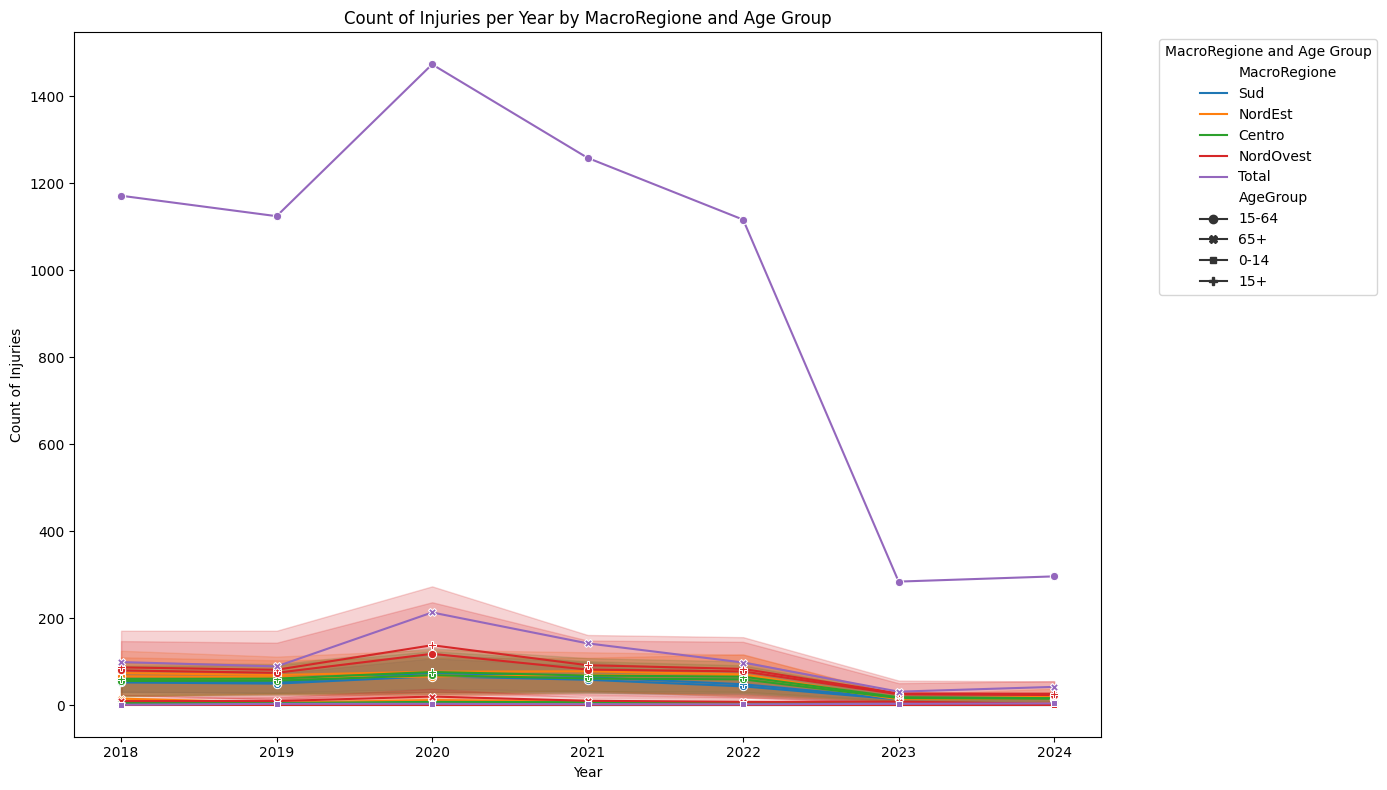

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=deaths_per_year_region_age, x='Year', y='Count', hue='MacroRegione', style='AgeGroup', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Injuries per Year by MacroRegione and Age Group')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='MacroRegione and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## 3 Mortalità

In [50]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Convert date columns to datetime if they are not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')
concatenated_df['DataMorte'] = pd.to_datetime(concatenated_df['DataMorte'], errors='coerce')

# Extract year from date columns
concatenated_df['YearAccadimento'] = concatenated_df['DataAccadimento'].dt.year
concatenated_df['YearMorte'] = concatenated_df['DataMorte'].dt.year

# Calculate total number of DataAccadimento and DataMorte for each MacroRegione in each year
data_accadimento_count = concatenated_df.groupby(['MacroRegione', 'DescrRegione', 'YearAccadimento']).size().reset_index(name='TotalDataAccadimento')
data_morte_count = concatenated_df.groupby(['MacroRegione', 'DescrRegione', 'YearMorte']).size().reset_index(name='TotalDataMorte')

# Merge the counts on MacroRegione, DescrRegione, and year
merged_counts = pd.merge(data_accadimento_count, data_morte_count, left_on=['MacroRegione', 'DescrRegione', 'YearAccadimento'], right_on=['MacroRegione', 'DescrRegione', 'YearMorte'], how='left')

# Fill NaN values in TotalDataMorte with 0
merged_counts['TotalDataMorte'] = merged_counts['TotalDataMorte'].fillna(0).astype(int)

# Calculate the ratio of DataMorte to DataAccadimento as a percentage
merged_counts['MorteOgniMilleIncidenti'] = (merged_counts['TotalDataMorte'] / merged_counts['TotalDataAccadimento']) * 1000

# Calculate the Percentage of TotalDataMorte over TotalDataAccadimento
merged_counts['PercentageMorteAccadimento'] = (merged_counts['TotalDataMorte'] / merged_counts['TotalDataAccadimento']) * 100

# Rename columns for clarity
merged_counts.rename(columns={'YearAccadimento': 'Year'}, inplace=True)

# Drop the redundant 'YearMorte' column
merged_counts.drop(columns=['YearMorte'], inplace=True)

# Calculate total values summing all MacroRegione
total_values = merged_counts.groupby(['MacroRegione', 'Year']).sum().reset_index()
total_values['DescrRegione'] = 'Total'

# Recalculate the MorteAccadimentoRatio and PercentageMorteAccadimento for the total values
total_values['MorteOgniMilleIncidenti'] = (total_values['TotalDataMorte'] / total_values['TotalDataAccadimento']) * 1000
total_values['PercentageMorteAccadimento'] = (total_values['TotalDataMorte'] / total_values['TotalDataAccadimento']) * 100

# Append the total values row to the merged_counts DataFrame
merged_counts = pd.concat([merged_counts, total_values], ignore_index=True)



In [51]:
# Print the final DataFrame for verification
mortalita = merged_counts

mortalita

,MacroRegione,DescrRegione,Year,TotalDataAccadimento,TotalDataMorte,MorteOgniMilleIncidenti,PercentageMorteAccadimento
0,Centro,Lazio,2018,45031,104,2.309520,0.230952
1,Centro,Lazio,2019,45318,111,2.449358,0.244936
2,Centro,Lazio,2020,37097,145,3.908672,0.390867
3,Centro,Lazio,2021,37708,141,3.739260,0.373926
4,Centro,Lazio,2022,54411,121,2.223815,0.222382
...,...,...,...,...,...,...,...
154,Sud,Total,2020,94203,490,5.201533,0.520153
155,Sud,Total,2021,94775,485,5.117383,0.511738
156,Sud,Total,2022,128562,338,2.629082,0.262908
157,Sud,Total,2023,42041,100,2.378630,0.237863


In [52]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming merged_counts DataFrame is already defined and contains the relevant data

# # Set up the plot
# plt.figure(figsize=(6, 4))
# sns.set_style('whitegrid')

# # Plot MorteAccadimentoRatio per MacroRegione based on Year
# sns.lineplot(x='Year', y='MorteAccadimentoRatio', hue='MacroRegione', data=merged_counts, marker='o', palette='Set2')

# # Set plot title and labels
# plt.title('MorteAccadimentoRatio per MacroRegione based on Year')
# plt.xlabel('Year')
# plt.ylabel('MorteAccadimentoRatio (%)')

# # Display the plot
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()


## Mashi vs Femmine

In [53]:
import pandas as pd

# Assuming 'concatenated_df' is already defined and contains the relevant data

# Convert 'DataAccadimento' to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'DescrRegione', 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
accidents_per_year_gender = concatenated_df.groupby(['DescrRegione', 'MacroRegione', 'Year', 'Genere']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = accidents_per_year_gender.groupby(['Year', 'Genere']).sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
accidents_per_year_gender = pd.concat([accidents_per_year_gender, total_values], ignore_index=True)

# Calculate the percentage per Year of each Count
accidents_per_year_gender['Percentage'] = 100 * accidents_per_year_gender['Count'] / accidents_per_year_gender.groupby('Year')['Count'].transform('sum')




In [54]:
# Print the final DataFrame for verification
accidents_per_year_gender

,DescrRegione,MacroRegione,Year,Genere,Count,Percentage
0,Abruzzo,Sud,2018,F,5118,0.405096
1,Abruzzo,Sud,2018,M,8795,0.696135
2,Abruzzo,Sud,2019,F,5079,0.402363
3,Abruzzo,Sud,2019,M,8305,0.657929
4,Abruzzo,Sud,2020,F,4582,0.408424
...,...,...,...,...,...,...
271,Total,Total,2022,M,406411,29.484514
272,Total,Total,2023,F,77610,18.338500
273,Total,Total,2023,M,133994,31.661500
274,Total,Total,2024,F,79467,18.365805


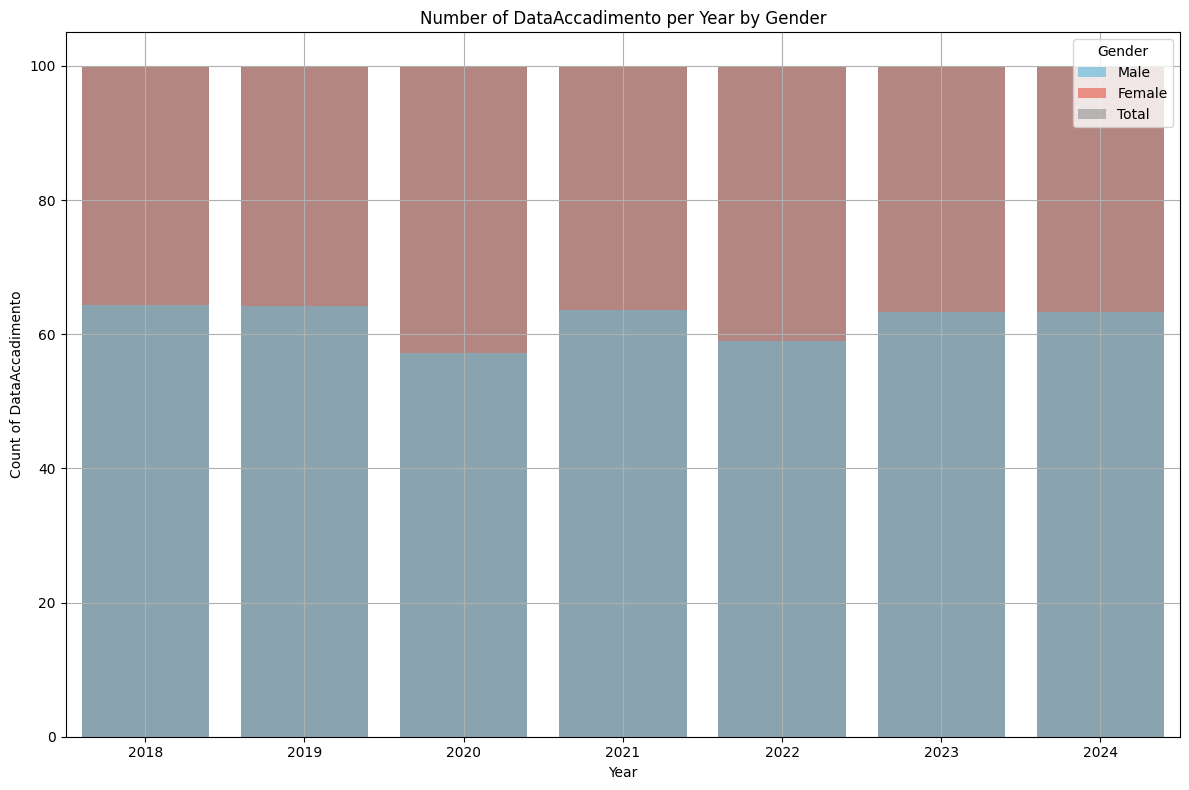

In [55]:

# Pivot the DataFrame for plotting
pivot_df = accidents_per_year_gender.pivot_table(index='Year', columns='Genere', values='Percentage', aggfunc='sum').reset_index()

# Calculate total counts for each year
pivot_df['Total'] = pivot_df['M'] + pivot_df['F']

# Plotting as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_df, x='Year', y='M', label='Male', color='skyblue')
sns.barplot(data=pivot_df, x='Year', y='F', label='Female', color='salmon', bottom=pivot_df['M'])
sns.barplot(data=pivot_df, x='Year', y='Total', label='Total', color='gray', alpha=0.5)

# Adding title and labels
plt.title('Number of DataAccadimento per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Count of DataAccadimento')
plt.legend(title='Gender')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### per morti 

In [56]:
import pandas as pd

# Assuming 'concatenated_df' is already defined and contains the relevant data

# Convert 'DataAccadimento' to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'DescrRegione', 'MacroRegione', 'Year', and 'Genere', and count the number of 'DataAccadimento'
deaths_per_year_gender = deaths.groupby(['DescrRegione', 'MacroRegione', 'Year', 'Genere']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and gender
total_values = deaths_per_year_gender.groupby(['Year', 'Genere']).sum().reset_index()
total_values['DescrRegione'] = 'Total'
total_values['MacroRegione'] = 'Total'

# Append the total values row to the accidents_per_year_gender DataFrame
deaths_per_year_gender = pd.concat([deaths_per_year_gender, total_values], ignore_index=True)

# Calculate the percentage per Year of each Count
deaths_per_year_gender['Percentage'] = 100 * deaths_per_year_gender['Count'] / deaths_per_year_gender.groupby('Year')['Count'].transform('sum')




C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1196861105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1196861105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [57]:
deaths_per_year_gender

,DescrRegione,MacroRegione,Year,Genere,Count,Percentage
0,Abruzzo,Sud,2018,F,3,0.118017
1,Abruzzo,Sud,2018,M,27,1.062156
2,Abruzzo,Sud,2019,F,2,0.082237
3,Abruzzo,Sud,2019,M,33,1.356908
4,Abruzzo,Sud,2020,F,7,0.207223
...,...,...,...,...,...,...
240,Total,Total,2022,M,1084,44.572368
241,Total,Total,2023,F,27,4.245283
242,Total,Total,2023,M,291,45.754717
243,Total,Total,2024,F,29,4.239766


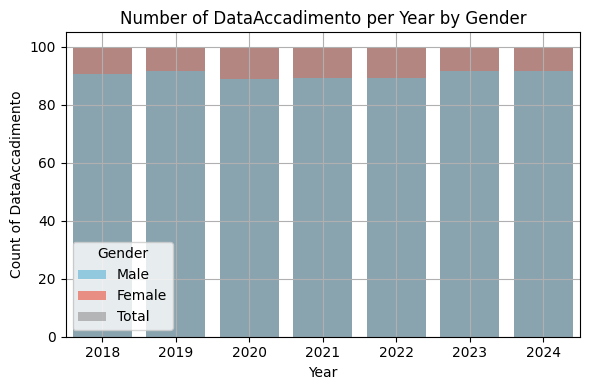

In [58]:

# Pivot the DataFrame for plotting
pivot_df = deaths_per_year_gender.pivot_table(index='Year', columns='Genere', values='Percentage', aggfunc='sum').reset_index()

# Calculate total counts for each year
pivot_df['Total'] = pivot_df['M'] + pivot_df['F']

# Plotting as a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=pivot_df, x='Year', y='M', label='Male', color='skyblue')
sns.barplot(data=pivot_df, x='Year', y='F', label='Female', color='salmon', bottom=pivot_df['M'])
sns.barplot(data=pivot_df, x='Year', y='Total', label='Total', color='gray', alpha=0.5)

# Adding title and labels
plt.title('Number of DataAccadimento per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Count of DataAccadimento')
plt.legend(title='Gender')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Nazionalità

In [59]:
import pandas as pd

# Assuming 'concatenated_df' is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'DescrRegione', 'Year', and 'DescrNazioneNascita', and count the number of 'DataAccadimento'
accidents_per_year_nationality = concatenated_df.groupby(['MacroRegione', 'DescrRegione', 'Year', 'DescrNazioneNascita']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and nationality
total_values = accidents_per_year_nationality.groupby(['Year', 'DescrNazioneNascita']).sum().reset_index()
total_values['MacroRegione'] = 'Total'
total_values['DescrRegione'] = 'Total'

# Append the total values row to the accidents_per_year_nationality DataFrame
accidents_per_year_nationality = pd.concat([accidents_per_year_nationality, total_values], ignore_index=True)

# Add the 'Nazionalità' column to accidents_per_year_nationality DataFrame
accidents_per_year_nationality['Nazionalità'] = accidents_per_year_nationality['DescrNazioneNascita'].apply(lambda x: 1 if x == 'ITALIA' else 0)



In [60]:
accidents_per_year_nationality

,MacroRegione,DescrRegione,Year,DescrNazioneNascita,Count,Nazionalità
0,Centro,Lazio,2018,AFGHANISTAN,20,0
1,Centro,Lazio,2018,ALBANIA,235,0
2,Centro,Lazio,2018,ALGERIA,13,0
3,Centro,Lazio,2018,ANGOLA,3,0
4,Centro,Lazio,2018,ANTILLE OLANDESI,1,0
...,...,...,...,...,...,...
13856,Total,Total,2024,VENEZUELA,245,0
13857,Total,Total,2024,VIETNAM,29,0
13858,Total,Total,2024,VIETNAM DEL SUD,1,0
13859,Total,Total,2024,ZAMBIA,4,0


In [61]:
import pandas as pd

# Assuming 'accidents_per_year_nationality' DataFrame is already defined and contains the relevant data

# Step 1: Group by MacroRegione, DescrRegione, Year, and Nazionalità, then sum the 'Count'
grouped_df = accidents_per_year_nationality.groupby(['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()

# Step 2: Create a total row for each year and Nazionalità within each MacroRegione
total_df = grouped_df.groupby(['MacroRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()
total_df['DescrRegione'] = 'Total'

# Step 3: Append the total rows to the original grouped DataFrame
final_df = pd.concat([grouped_df, total_df], ignore_index=True)

# Reordering the columns if necessary
final_df = final_df[['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità', 'Count']]

# Renaming 'Count' to 'FinalCount' for clarity
final_df.rename(columns={'Count': 'FinalCount'}, inplace=True)

# Step 4: Calculate percentage of Count for each Year
final_df['TotalCount'] = final_df.groupby('Year')['FinalCount'].transform('sum')
final_df['Percentage'] = (final_df['FinalCount'] / final_df['TotalCount']) * 100

# Drop the temporary 'TotalCount' column if no longer needed
final_df.drop(columns=['TotalCount'], inplace=True)

# Rename 'FinalCount' back to 'Count'
final_df.rename(columns={'FinalCount': 'Count'}, inplace=True)


# Step 1: Group by MacroRegione, DescrRegione, Year, and Nazionalità, then sum the 'Count'
grouped_df = accidents_per_year_nationality.groupby(['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()

# Step 2: Create a total row for each year and Nazionalità within each MacroRegione
total_df = grouped_df.groupby(['MacroRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()
total_df['DescrRegione'] = 'Total'

# Step 3: Append the total rows to the original grouped DataFrame
final_df = pd.concat([grouped_df, total_df], ignore_index=True)

# Reordering the columns if necessary
final_df = final_df[['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità', 'Count']]

# Step 4: Drop rows where 'Nazionalità' is 'Total'
final_df = final_df[final_df['Nazionalità'] != 'Total']

# Step 5: Calculate total count for each year and DescrRegione 'Total'
total_counts = final_df[final_df['DescrRegione'] == 'Total'].groupby('Year')['Count'].sum().reset_index()
total_counts.rename(columns={'Count': 'TotalDescrRegioneCount'}, inplace=True)

# Step 6: Merge total counts back into the final_df
final_df = pd.merge(final_df, total_counts, on='Year', how='left')

# Step 7: Calculate percentage for DescrRegione 'Total'
final_df.loc[final_df['DescrRegione'] == 'Total', 'Percentage'] = (final_df['Count'] / final_df['TotalDescrRegioneCount']) * 100

# Step 8: Drop unnecessary columns
final_df.drop(columns=['TotalDescrRegioneCount'], inplace=True)

# Step 9: Drop rows where DescrRegione is 'Total' and MacroRegione is not 'Total'
final_df = final_df[~((final_df['DescrRegione'] == 'Total') & (final_df['MacroRegione'] != 'Total'))]

# Step 10: Drop duplicate rows if any
final_df = final_df.drop_duplicates()


# # Display the final DataFrame with percentages
# print(final_df)


In [62]:
finale=final_df[final_df['DescrRegione']=='Total']
finale[finale['Year']==2018]

,MacroRegione,DescrRegione,Year,Nazionalità,Count,Percentage
262,Total,Total,2018,0,104539,5.516261
263,Total,Total,2018,1,527163,27.817072


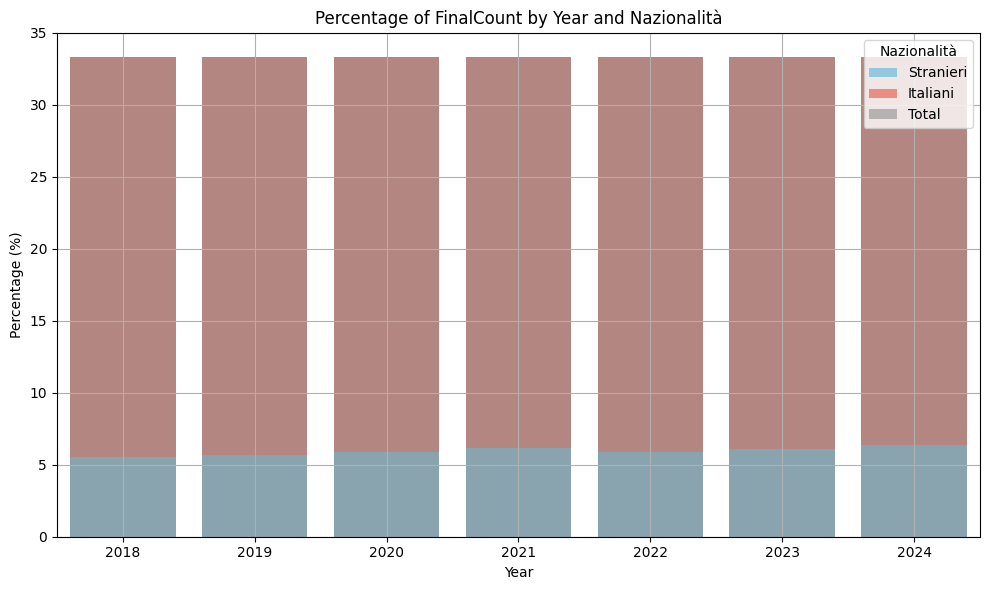

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Replace Nazionalità values
final_df['Nazionalità'] = final_df['Nazionalità'].replace({
    'Stranieri': 0,
    'Italiani': 1
})

# Pivot the DataFrame for plotting
pivot_df = final_df.pivot_table(index='Year', columns='Nazionalità', values='Percentage', aggfunc='sum').reset_index()

# Calculate total counts for each year
pivot_df['Total'] = pivot_df[0] + pivot_df[1]

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x='Year', y=0, label='Stranieri', color='skyblue')
sns.barplot(data=pivot_df, x='Year', y=1, label='Italiani', color='salmon', bottom=pivot_df[0])
sns.barplot(data=pivot_df, x='Year', y='Total', label='Total', color='gray', alpha=0.5)

# Adding title and labels
plt.title('Percentage of FinalCount by Year and Nazionalità')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Nazionalità')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# # Plotting
# plt.figure(figsize=(7, 4))

# # Use seaborn to create a line plot
# sns.lineplot(data=data, x='Year', y='FinalCount', hue='DescrRegione', style='Nazionalità', markers=True, dashes=False)

# # Adding title and labels
# plt.title('Count of FinalCount per Year by MacroRegione and Nazionalità')
# plt.xlabel('Year')
# plt.ylabel('Final Count')
# plt.legend(title='MacroRegione and Nazionalità', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()

### per morti

In [65]:
import pandas as pd

# Assuming 'concatenated_df' is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
deaths['Year'] = deaths['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'DescrRegione', 'Year', and 'DescrNazioneNascita', and count the number of 'DataAccadimento'
deaths_per_year_nationality = deaths.groupby(['MacroRegione', 'DescrRegione', 'Year', 'DescrNazioneNascita']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and nationality
total_values = deaths_per_year_nationality.groupby(['Year', 'DescrNazioneNascita']).sum().reset_index()
total_values['MacroRegione'] = 'Total'
total_values['DescrRegione'] = 'Total'

# Append the total values row to the accidents_per_year_nationality DataFrame
deaths_per_year_nationality = pd.concat([deaths_per_year_nationality, total_values], ignore_index=True)

# Add the 'Nazionalità' column to accidents_per_year_nationality DataFrame
deaths_per_year_nationality['Nazionalità'] = deaths_per_year_nationality['DescrNazioneNascita'].apply(lambda x: 1 if x == 'ITALIA' else 0)



C:\Users\danie\AppData\Local\Temp\ipykernel_24884\2824626014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'], errors='coerce')
C:\Users\danie\AppData\Local\Temp\ipykernel_24884\2824626014.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Year'] = deaths['DataAccadimento'].dt.year


In [66]:
import pandas as pd

# Assuming 'deaths_per_year_nationality' DataFrame is already defined and contains the relevant data

# Step 1: Group by MacroRegione, DescrRegione, Year, and Nazionalità, then sum the 'Count'
grouped_df = deaths_per_year_nationality.groupby(['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()

# Step 2: Create a total row for each year and Nazionalità within each MacroRegione
total_df = grouped_df.groupby(['MacroRegione', 'Year', 'Nazionalità']).agg({'Count': 'sum'}).reset_index()
total_df['DescrRegione'] = 'Total'

# Step 3: Append the total rows to the original grouped DataFrame
death_final_df = pd.concat([grouped_df, total_df], ignore_index=True)

# Reordering the columns if necessary
death_final_df = death_final_df[['MacroRegione', 'DescrRegione', 'Year', 'Nazionalità', 'Count']]

# Step 4: Drop rows where 'Nazionalità' is 'Total'
death_final_df = death_final_df[death_final_df['Nazionalità'] != 'Total']

# Step 5: Calculate total count for each year and DescrRegione 'Total'
total_counts = death_final_df[death_final_df['DescrRegione'] == 'Total'].groupby('Year')['Count'].sum().reset_index()
total_counts.rename(columns={'Count': 'TotalDescrRegioneCount'}, inplace=True)

# Step 6: Merge total counts back into the death_final_df
death_final_df = pd.merge(death_final_df, total_counts, on='Year', how='left')

# Step 7: Calculate percentage for DescrRegione 'Total'
death_final_df.loc[death_final_df['DescrRegione'] == 'Total', 'Percentage'] = (death_final_df['Count'] / death_final_df['TotalDescrRegioneCount']) * 100

# Step 8: Drop unnecessary columns
death_final_df.drop(columns=['TotalDescrRegioneCount'], inplace=True)

# Step 9: Drop rows where DescrRegione is 'Total' and MacroRegione is not 'Total'
death_final_df = death_final_df[~((death_final_df['DescrRegione'] == 'Total') & (death_final_df['MacroRegione'] != 'Total'))]

# Step 10: Drop duplicate rows if any
death_final_df = death_final_df.drop_duplicates()




In [67]:
death_finale = death_final_df[death_final_df['DescrRegione']== 'Total']
death_finale[death_finale['Year']== 2018]

,MacroRegione,DescrRegione,Year,Nazionalità,Count,Percentage
249,Total,Total,2018,0,217,5.691057
250,Total,Total,2018,1,1054,27.642276


In [68]:
# # Filtra i dati per MacroRegione = 'Total'
# total_df = death_final_df[death_final_df['MacroRegione'] == 'Total']

# # Pivot the data to get it in the right shape for a line chart
# pivot_df = total_df.pivot_table(index='Year', columns='Nazionalità', values='FinalCount', aggfunc='sum').fillna(0)

# # Plotting
# plt.figure(figsize=(8, 5))
# for column in pivot_df.columns:
#     plt.plot(pivot_df.index, pivot_df[column], marker='o', label=f'Nazionalità {column}', color='red' if column == 0 else 'blue')

# plt.xlabel('Year')
# plt.ylabel('Final Count')
# plt.title('Line Chart of Final Count for Total MacroRegione by Year')
# plt.legend(title='Nazionalità')
# plt.grid(True)
# plt.show()

## Attività economica

In [69]:
import pandas as pd

# Assuming concatenated_df is already defined and contains the relevant data

# Get all unique values of 'DescrAtecoLiv1'
unique_ateco_values = concatenated_df['DescrAtecoLiv1'].unique()

# Print the unique values
for i in unique_ateco_values:
    print(i, '\n')


Non determinato 

Noleggio, agenzie di viaggio, servizi di supporto alle imprese 

Sanita' e assistenza sociale 

Attivita' dei servizi di alloggio e di ristorazione 

Attivita' immobiliari 

Attivita' manifatturiere 

Commercio all'ingrosso e al dettaglio, riparazione di autoveicoli e motocicli 

Fornitura di acqua, reti fognarie, attivita' di gestione dei rifiuti e risanamento 

Servizi di informazione e comunicazione 

Trasporto e magazzinaggio 

Costruzioni 

Estrazione di minerali da cave e miniere 

Istruzione 

Altre attivita' di servizi 

Attivita' finanziarie e assicurative 

Amministrazione pubblica e difesa, assicurazione sociale obbligatoria 

Agricoltura, silvicoltura e pesca 

Attivita' artistiche, sportive, di intrattenimento e divertimento 

Attivita' professionali, scientifiche e tecniche 

Fornitura di energia elettrica, gas, vapore e aria condizionata 

Organizzazioni ed organismi extraterritoriali 

Attivita' di famiglie e convivenze come datori di lavoro per person

In [70]:
import pandas as pd

# Assuming 'concatenated_df' is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
concatenated_df['DataAccadimento'] = pd.to_datetime(concatenated_df['DataAccadimento'], errors='coerce')

# Extract year from 'DataAccadimento' column
concatenated_df['Year'] = concatenated_df['DataAccadimento'].dt.year

# Group by 'MacroRegione', 'DescrRegione', 'Year', and 'DescrAtecoLiv1', and count the number of 'DataAccadimento'
accidents_per_year_job = concatenated_df.groupby(['MacroRegione', 'DescrRegione', 'Year', 'DescrAtecoLiv1']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year and job category
total_values = accidents_per_year_job.groupby(['Year', 'DescrAtecoLiv1']).sum().reset_index()
total_values['MacroRegione'] = 'Total'
total_values['DescrRegione'] = 'Total'

# Append the total values row to the accidents_per_year_job DataFrame
accidents_per_year_job = pd.concat([accidents_per_year_job, total_values], ignore_index=True)



In [71]:
# Define the dictionary mapping DescrAtecoLiv1 to Settore
settori = {
    "Primario": [
        'Agricoltura, silvicoltura e pesca',
        'Estrazione di minerali da cave e miniere'
    ],
    "Secondario": [
        'Attivita\' manifatturiere',
        'Costruzioni',
        'Fornitura di acqua, reti fognarie, attivita\' di gestione dei rifiuti e risanamento',
        'Fornitura di energia elettrica, gas, vapore e aria condizionata'
    ],
    "Terziario": [
        "Altre attivita' di servizi",
        'Amministrazione pubblica e difesa, assicurazione sociale obbligatoria',
        "Attivita' artistiche, sportive, di intrattenimento e divertimento",
        "Attivita' dei servizi di alloggio e di ristorazione",
        "Attivita' di famiglie e convivenze come datori di lavoro per personale domestico, produzione di beni e servizi indifferenziati per uso proprio da parte di famiglie e convivenze",
        "Attivita' finanziarie e assicurative",
        "Attivita' immobiliari",
        "Attivita' professionali, scientifiche e tecniche",
        "Commercio all'ingrosso e al dettaglio, riparazione di autoveicoli e motocicli",
        'Istruzione',
        'Noleggio, agenzie di viaggio, servizi di supporto alle imprese',
        'Non determinato',
        'Organizzazioni ed organismi extraterritoriali',
        "Sanita' e assistenza sociale",
        'Servizi di informazione e comunicazione',
        'Trasporto e magazzinaggio'
    ]
}

# Create a reverse mapping from DescrAtecoLiv1 to Settore
settore_mapping = {value: key for key, values in settori.items() for value in values}

# Add the Settore column to the concatenated_df DataFrame
concatenated_df['Settore'] = concatenated_df['DescrAtecoLiv1'].map(settore_mapping)

# Group by 'MacroRegione', 'DescrRegione', 'Year', 'DescrAtecoLiv1', and 'Settore', and count the number of 'DataAccadimento'
accidents_per_year_job = concatenated_df.groupby(['MacroRegione', 'DescrRegione', 'Year', 'DescrAtecoLiv1', 'Settore']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year, job category, and settore
total_values = accidents_per_year_job.groupby(['Year', 'DescrAtecoLiv1', 'Settore']).sum().reset_index()
total_values['MacroRegione'] = 'Total'
total_values['DescrRegione'] = 'Total'

# Append the total values row to the accidents_per_year_job DataFrame
accidents_per_year_job = pd.concat([accidents_per_year_job, total_values], ignore_index=True)

# Step 1: Group by 'Year' to calculate total accidents per year
total_accidents_per_year = accidents_per_year_job.groupby('Year')['Count'].sum()

# Step 2: Calculate the percentage of 'Count' for each year
accidents_per_year_job['Percentage'] = accidents_per_year_job.apply(lambda row: (row['Count'] / total_accidents_per_year[row['Year']]) * 100, axis=1)




In [72]:
accidents_per_year_job


,MacroRegione,DescrRegione,Year,DescrAtecoLiv1,Settore,Count,Percentage
0,Centro,Lazio,2018,"Agricoltura, silvicoltura e pesca",Primario,52,0.004116
1,Centro,Lazio,2018,Altre attivita' di servizi,Terziario,547,0.043296
2,Centro,Lazio,2018,"Amministrazione pubblica e difesa, assicurazio...",Terziario,1322,0.104638
3,Centro,Lazio,2018,"Attivita' artistiche, sportive, di intrattenim...",Terziario,444,0.035143
4,Centro,Lazio,2018,Attivita' dei servizi di alloggio e di ristora...,Terziario,3263,0.258271
...,...,...,...,...,...,...,...
2844,Total,Total,2024,Non determinato,Terziario,92592,21.399154
2845,Total,Total,2024,Organizzazioni ed organismi extraterritoriali,Terziario,16,0.003698
2846,Total,Total,2024,Sanita' e assistenza sociale,Terziario,16660,3.850332
2847,Total,Total,2024,Servizi di informazione e comunicazione,Terziario,1430,0.330491


In [73]:
# Group by 'MacroRegione', 'DescrRegione', 'Settore', and 'Year', and sum the 'Count'
settore_year_counts = accidents_per_year_job.groupby(['MacroRegione', 'DescrRegione', 'Settore', 'Year']).agg({'Count': 'sum'}).reset_index()

# Calculate the total count for each 'MacroRegione', 'DescrRegione', and 'Year'
total_year_counts = settore_year_counts.groupby(['MacroRegione', 'DescrRegione', 'Year'])['Count'].sum().reset_index()
total_year_counts.rename(columns={'Count': 'TotalCount'}, inplace=True)

# Merge the total counts with the settore_year_counts DataFrame
settore_year_counts = pd.merge(settore_year_counts, total_year_counts, on=['MacroRegione', 'DescrRegione', 'Year'])

# Calculate the percentage of each 'Settore' per 'MacroRegione', 'DescrRegione', and 'Year'
settore_year_counts['Percentage'] = (settore_year_counts['Count'] / settore_year_counts['TotalCount']) * 100

# Drop the 'TotalCount' column if not needed
settore_year_counts.drop(columns=['TotalCount'], inplace=True)

# Reorder columns if necessary
settore_year_counts = settore_year_counts[['MacroRegione', 'DescrRegione', 'Settore', 'Year', 'Count', 'Percentage']]


In [74]:
settore_year_counts

,MacroRegione,DescrRegione,Settore,Year,Count,Percentage
0,Centro,Lazio,Primario,2018,113,0.250938
1,Centro,Lazio,Primario,2019,93,0.205216
2,Centro,Lazio,Primario,2020,89,0.239912
3,Centro,Lazio,Primario,2021,85,0.225416
4,Centro,Lazio,Primario,2022,65,0.119461
...,...,...,...,...,...,...
407,Total,Total,Terziario,2020,441794,78.760003
408,Total,Total,Terziario,2021,410345,74.208401
409,Total,Total,Terziario,2022,539257,78.244587
410,Total,Total,Terziario,2023,167957,79.373263


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

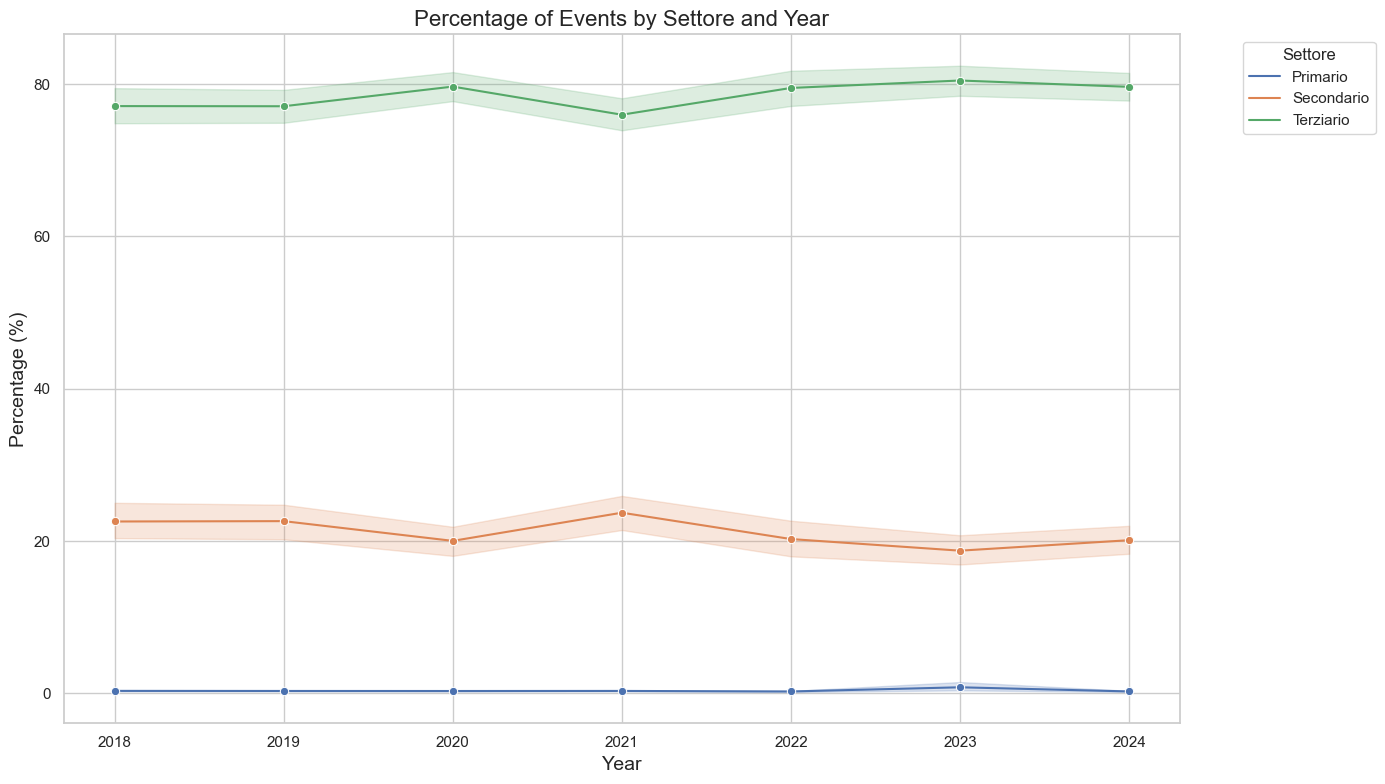

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=settore_year_counts, x='Year', y='Percentage', hue='Settore', marker='o')

# Add title and labels
plt.title('Percentage of Events by Settore and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Settore', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [76]:
# import seaborn as sns

# # Plotting the data
# plt.figure(figsize=(14, 8))

# # Use seaborn to create a line plot
# sns.lineplot(data=accidents_per_year_job, x='Year', y='Count', hue='MacroRegione', style='DescrAtecoLiv1', markers=True, dashes=False)

# # Adding title and labels
# plt.title('Count of Incidents per Year by MacroRegione and Job Description')
# plt.xlabel('Year')
# plt.ylabel('Count of Incidents')
# plt.legend(title='MacroRegione and Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

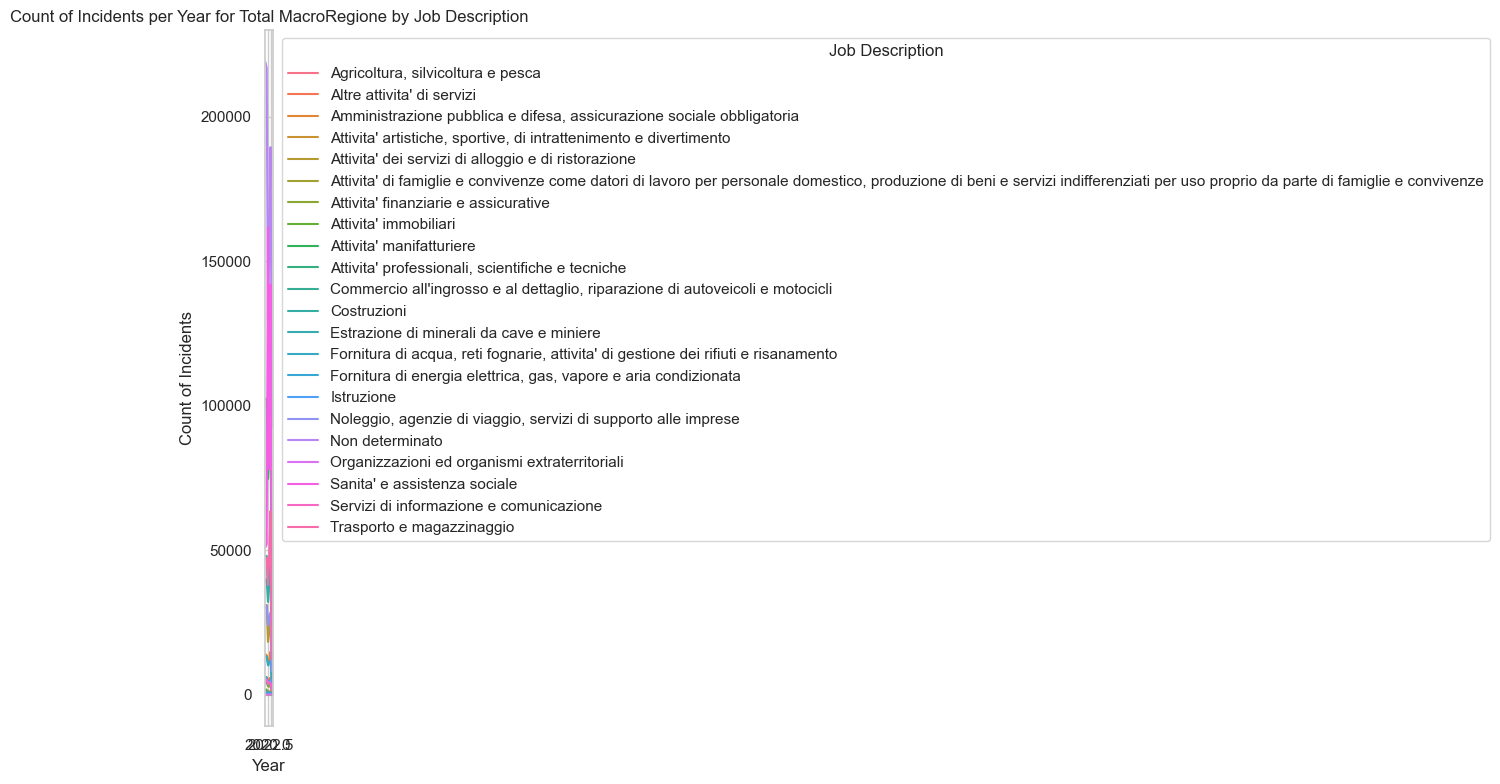

In [77]:
# Append the total values row to the accidents_per_year_job DataFrame
accidents_per_year_job = pd.concat([accidents_per_year_job, total_values], ignore_index=True)

# Filter for rows where MacroRegione is 'Total'
total_only = accidents_per_year_job[accidents_per_year_job['MacroRegione'] == 'Total']

# Plotting the data
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=total_only, x='Year', y='Count', hue='DescrAtecoLiv1', markers=True, dashes=False)

# Adding title and labels
plt.title('Count of Incidents per Year for Total MacroRegione by Job Description')
plt.xlabel('Year')
plt.ylabel('Count of Incidents')
plt.legend(title='Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Per morti

In [78]:
# Define the dictionary mapping DescrAtecoLiv1 to Settore
settori = {
    "Primario": [
        'Agricoltura, silvicoltura e pesca',
        'Estrazione di minerali da cave e miniere'
    ],
    "Secondario": [
        'Attivita\' manifatturiere',
        'Costruzioni',
        'Fornitura di acqua, reti fognarie, attivita\' di gestione dei rifiuti e risanamento',
        'Fornitura di energia elettrica, gas, vapore e aria condizionata'
    ],
    "Terziario": [
        "Altre attivita' di servizi",
        'Amministrazione pubblica e difesa, assicurazione sociale obbligatoria',
        "Attivita' artistiche, sportive, di intrattenimento e divertimento",
        "Attivita' dei servizi di alloggio e di ristorazione",
        "Attivita' di famiglie e convivenze come datori di lavoro per personale domestico, produzione di beni e servizi indifferenziati per uso proprio da parte di famiglie e convivenze",
        "Attivita' finanziarie e assicurative",
        "Attivita' immobiliari",
        "Attivita' professionali, scientifiche e tecniche",
        "Commercio all'ingrosso e al dettaglio, riparazione di autoveicoli e motocicli",
        'Istruzione',
        'Noleggio, agenzie di viaggio, servizi di supporto alle imprese',
        'Non determinato',
        'Organizzazioni ed organismi extraterritoriali',
        "Sanita' e assistenza sociale",
        'Servizi di informazione e comunicazione',
        'Trasporto e magazzinaggio'
    ]
}

# Create a reverse mapping from DescrAtecoLiv1 to Settore
settore_mapping = {value: key for key, values in settori.items() for value in values}

# Add the Settore column to the concatenated_df DataFrame
deaths['Settore'] = deaths['DescrAtecoLiv1'].map(settore_mapping)

# Group by 'MacroRegione', 'DescrRegione', 'Year', 'DescrAtecoLiv1', and 'Settore', and count the number of 'DataAccadimento'
deaths_per_year_job = deaths.groupby(['MacroRegione', 'DescrRegione', 'Year', 'DescrAtecoLiv1', 'Settore']).size().reset_index(name='Count')

# Calculate total values summing all MacroRegione for each year, job category, and settore
total_values = deaths_per_year_job.groupby(['Year', 'DescrAtecoLiv1', 'Settore']).sum().reset_index()
total_values['MacroRegione'] = 'Total'
total_values['DescrRegione'] = 'Total'

# Append the total values row to the accidents_per_year_job DataFrame
deaths_per_year_job = pd.concat([deaths_per_year_job, total_values], ignore_index=True)

# Step 1: Group by 'Year' to calculate total accidents per year
total_accidents_per_year = deaths_per_year_job.groupby('Year')['Count'].sum()

# Step 2: Calculate the percentage of 'Count' for each year
deaths_per_year_job['Percentage'] = deaths_per_year_job.apply(lambda row: (row['Count'] / total_accidents_per_year[row['Year']]) * 100, axis=1)




C:\Users\danie\AppData\Local\Temp\ipykernel_24884\4017761771.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Settore'] = deaths['DescrAtecoLiv1'].map(settore_mapping)


In [79]:
deaths_per_year_job



,MacroRegione,DescrRegione,Year,DescrAtecoLiv1,Settore,Count,Percentage
0,Centro,Lazio,2018,Altre attivita' di servizi,Terziario,1,0.039339
1,Centro,Lazio,2018,"Amministrazione pubblica e difesa, assicurazio...",Terziario,1,0.039339
2,Centro,Lazio,2018,Attivita' dei servizi di alloggio e di ristora...,Terziario,8,0.314713
3,Centro,Lazio,2018,Attivita' finanziarie e assicurative,Terziario,3,0.118017
4,Centro,Lazio,2018,Attivita' manifatturiere,Secondario,7,0.275374
...,...,...,...,...,...,...,...
1428,Total,Total,2024,Non determinato,Terziario,98,14.327485
1429,Total,Total,2024,Organizzazioni ed organismi extraterritoriali,Terziario,1,0.146199
1430,Total,Total,2024,Sanita' e assistenza sociale,Terziario,7,1.023392
1431,Total,Total,2024,Servizi di informazione e comunicazione,Terziario,5,0.730994


In [80]:
# Group by 'MacroRegione', 'DescrRegione', 'Settore', and 'Year', and sum the 'Count'
deaths_settore_year_counts = deaths_per_year_job.groupby(['MacroRegione', 'DescrRegione', 'Settore', 'Year']).agg({'Count': 'sum'}).reset_index()

# Calculate the total count for each 'MacroRegione', 'DescrRegione', and 'Year'
total_year_counts = deaths_settore_year_counts.groupby(['MacroRegione', 'DescrRegione', 'Year'])['Count'].sum().reset_index()
total_year_counts.rename(columns={'Count': 'TotalCount'}, inplace=True)

# Merge the total counts with the settore_year_counts DataFrame
deaths_settore_year_counts = pd.merge(deaths_settore_year_counts, total_year_counts, on=['MacroRegione', 'DescrRegione', 'Year'])

# Calculate the percentage of each 'Settore' per 'MacroRegione', 'DescrRegione', and 'Year'
deaths_settore_year_counts['Percentage'] = (deaths_settore_year_counts['Count'] / deaths_settore_year_counts['TotalCount']) * 100

# Drop the 'TotalCount' column if not needed
deaths_settore_year_counts.drop(columns=['TotalCount'], inplace=True)

# Reorder columns if necessary
deaths_settore_year_counts = deaths_settore_year_counts[['MacroRegione', 'DescrRegione', 'Settore', 'Year', 'Count', 'Percentage']]


In [81]:
deaths_settore_year_counts

,MacroRegione,DescrRegione,Settore,Year,Count,Percentage
0,Centro,Lazio,Primario,2019,1,0.877193
1,Centro,Lazio,Primario,2021,1,0.757576
2,Centro,Lazio,Secondario,2018,25,23.584906
3,Centro,Lazio,Secondario,2019,30,26.315789
4,Centro,Lazio,Secondario,2020,35,22.292994
...,...,...,...,...,...,...
322,Total,Total,Terziario,2020,1180,69.863825
323,Total,Total,Terziario,2021,915,65.263909
324,Total,Total,Terziario,2022,795,65.378289
325,Total,Total,Terziario,2023,234,73.584906


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

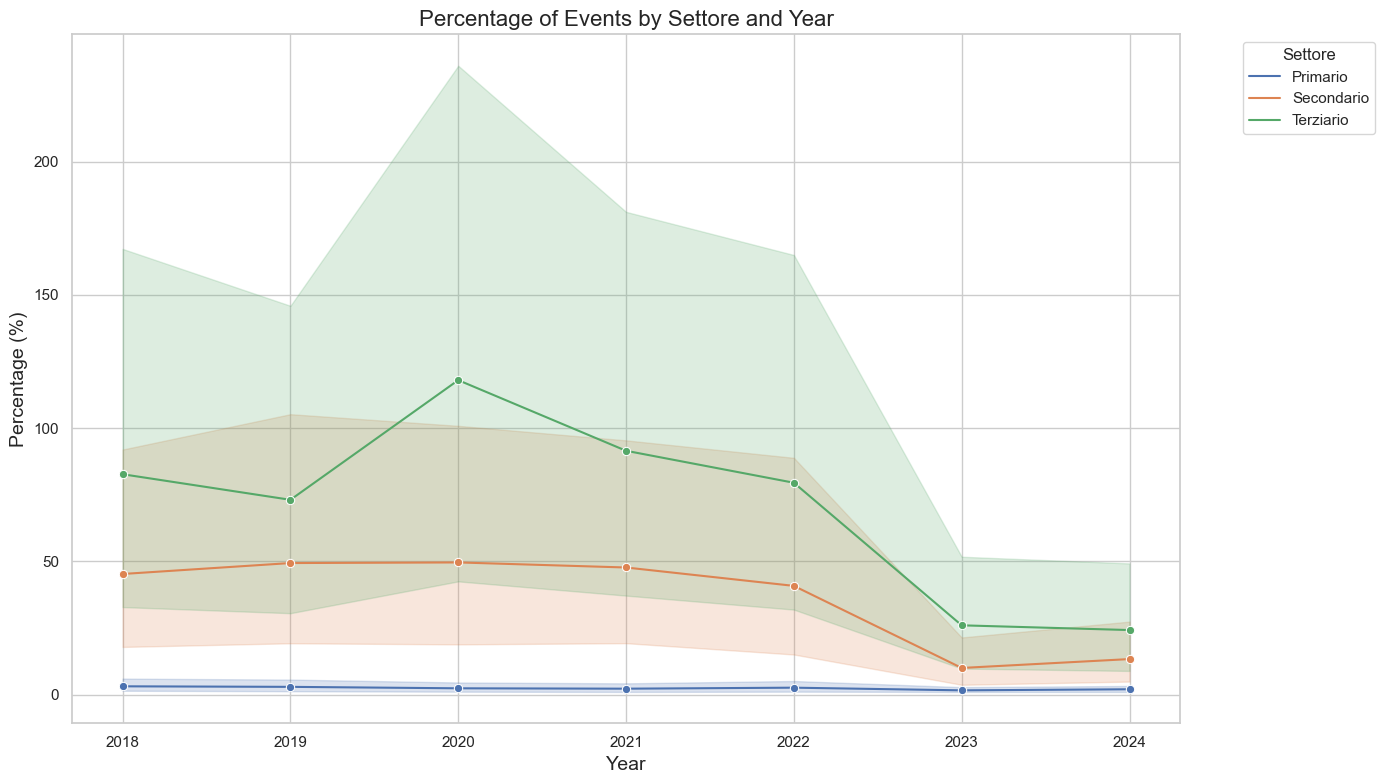

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=deaths_settore_year_counts, x='Year', y='Count', hue='Settore', marker='o')

# Add title and labels
plt.title('Percentage of Events by Settore and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Settore', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [83]:
# # Append the total values row to the accidents_per_year_job DataFrame
# deaths_per_year_job = pd.concat([deaths_per_year_job, total_values], ignore_index=True)

# # Filter for rows where MacroRegione is 'Total'
# total_only = deaths_per_year_job[deaths_per_year_job['MacroRegione'] == 'Total']

# # Plotting the data
# plt.figure(figsize=(14, 8))

# # Use seaborn to create a line plot
# sns.lineplot(data=total_only, x='Year', y='Count', hue='DescrAtecoLiv1', markers=True, dashes=False)

# # Adding title and labels
# plt.title('Count of Incidents per Year for Total MacroRegione by Job Description')
# plt.xlabel('Year')
# plt.ylabel('Count of Incidents')
# plt.legend(title='Job Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()

# tipo boh: nella sanità

In [84]:
# Filter concatenated_df for SettoreAttivitaEconomica values 'Q 86', 'Q 87', 'Q 88'
filtered_df = concatenated_df[concatenated_df['SettoreAttivitaEconomica'].isin(['Q 86', 'Q 87', 'Q 88'])]

# Group by MacroRegione, Year and sum the occurrences
sector_counts = filtered_df.groupby(['MacroRegione', concatenated_df['DataAccadimento'].dt.year])['SettoreAttivitaEconomica'].count().reset_index(name='Count')


KeyError: 'SettoreAttivitaEconomica'

In [ ]:
sector_counts

,MacroRegione,DataAccadimento,Count
0,Centro,2018,10631
1,Centro,2019,10982
2,Centro,2020,24052
3,Centro,2021,15198
4,Centro,2022,25927
5,Centro,2023,3045
6,Centro,2024,3672
7,NordEst,2018,13261
8,NordEst,2019,13680
9,NordEst,2020,42774


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

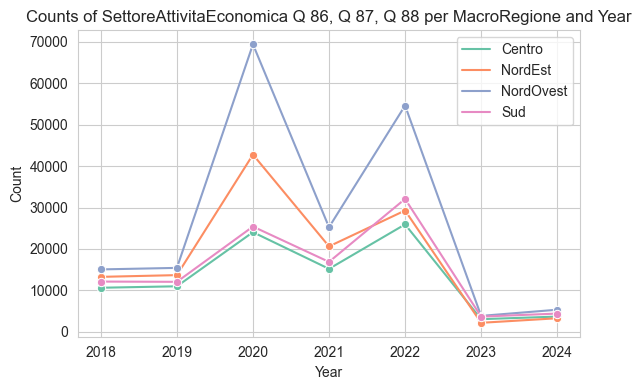

In [ ]:
# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot MorteAccadimentoRatio per MacroRegione based on Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
deaths

,Eta,IdentificativoCaso,SettoreAttivitaEconomica,DataRilevazione,LuogoNascita,DescrDecisioneIstruttoriaEsitoMortale,Genere,DescrProvincia,MacroRegione,DataMorte,...,DataProtocollo,DataDefinizione,DataAccadimento,DecisioneIstruttoriaEsitoMortale,DescrAtecoLiv1,DescrRegione,IdentificativoDatoreLavoro,GradoMenomazione,Year,AgeGroup
42989,38,21275880,G 47,2023-10-31,ITAL,Morte Con Superstiti Itinere,F,Chieti,Sud,2018-01-02,...,2018-01-05,2018-02-12,2018-01-02,017,"Commercio all'ingrosso e al dettaglio, riparaz...",Abruzzo,8526303,-1.0,2018,15-64
33099,55,21216326,ND,2023-10-31,ITAL,Esiti Mortali Nei Termini Con Superstiti,M,L'Aquila,Sud,2018-01-08,...,2018-01-10,2018-02-20,2018-01-08,015,Non determinato,Abruzzo,-1,-1.0,2018,15-64
41117,53,21221823,F 42,2023-10-31,ITAL,Esiti Mortali Nei Termini Con Superstiti,M,L'Aquila,Sud,2018-01-30,...,2018-01-30,2018-03-27,2018-01-30,015,Costruzioni,Abruzzo,3512502,-1.0,2018,15-64
35044,62,21484899,F 43,2023-10-31,ITAL,Esiti Mortali Nei Termini Senza Superstiti,M,Pescara,Sud,2018-02-23,...,2018-02-24,2018-05-03,2018-02-23,016,Costruzioni,Abruzzo,9474962,-1.0,2018,15-64
49663,42,21360828,C 17,2023-10-31,ITAL,Esiti Mortali Nei Termini Senza Superstiti,M,L'Aquila,Sud,2018-03-15,...,2018-03-16,2018-06-01,2018-03-15,016,Attivita' manifatturiere,Abruzzo,3260011,-1.0,2018,15-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951042,52,24762236,C 25,2023-10-31,ITAL,Morte non riconducibile all'evento,M,Vicenza,NordEst,2022-12-19,...,2022-12-20,2023-01-03,2022-12-19,244,Attivita' manifatturiere,Veneto,3547113,-1.0,2022,15-64
2964502,54,24765767,C 33,2023-10-31,ITAL,Morte non riconducibile all'evento,M,Venezia,NordEst,2022-12-19,...,2022-12-22,2023-02-03,2022-12-19,244,Attivita' manifatturiere,Veneto,4708023,-1.0,2022,15-64
2860222,66,24774762,F 41,2023-10-31,Z100,Esiti Mortali Nei Termini Con Superstiti,M,Verona,NordEst,2022-12-23,...,2022-12-27,2023-02-07,2022-12-23,015,Costruzioni,Veneto,1768064,-1.0,2022,65+
2765570,44,24808491,C 28,2023-10-31,ITAL,Morte non riconducibile all'evento,M,Padova,NordEst,2022-12-31,...,2023-01-02,2023-01-23,2022-12-28,244,Attivita' manifatturiere,Veneto,4797313,-1.0,2022,15-64


C:\Users\danie\AppData\Local\Temp\ipykernel_32068\2489000371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'])
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

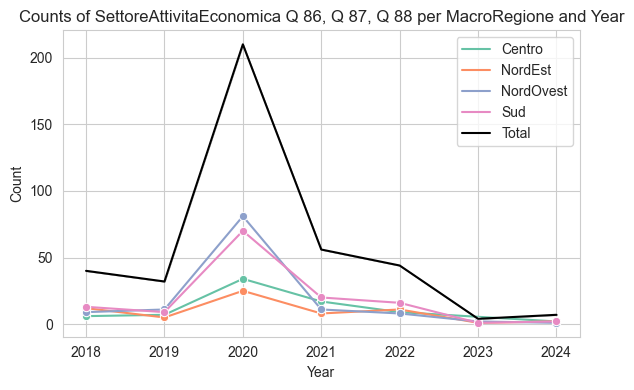

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming deaths DataFrame is already defined and contains the relevant data

# Convert DataAccadimento to datetime type if it's not already
deaths['DataAccadimento'] = pd.to_datetime(deaths['DataAccadimento'])

# Filter deaths DataFrame for SettoreAttivitaEconomica values 'Q 86', 'Q 87', 'Q 88'
filtered_df = deaths[deaths['SettoreAttivitaEconomica'].isin(['Q 86', 'Q 87', 'Q 88'])]

# Group by MacroRegione, Year and sum the occurrences
sector_counts = filtered_df.groupby(['MacroRegione', deaths['DataAccadimento'].dt.year])['SettoreAttivitaEconomica'].count().reset_index(name='Count')

# Calculate total sum for each year
total_sum = sector_counts.groupby('DataAccadimento')['Count'].sum().reset_index(name='Total')
sector_counts = pd.merge(sector_counts, total_sum, on='DataAccadimento')

# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Plot total line
sns.lineplot(x='DataAccadimento', y='Total', data=sector_counts, color='black', label='Total')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
sector_counts

,MacroRegione,DataAccadimento,Count,Total
0,Centro,2018,6,40
1,Centro,2019,7,32
2,Centro,2020,34,210
3,Centro,2021,17,56
4,Centro,2022,9,44
5,Centro,2024,2,7
6,NordEst,2018,12,40
7,NordEst,2019,5,32
8,NordEst,2020,25,210
9,NordEst,2021,8,56


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-p

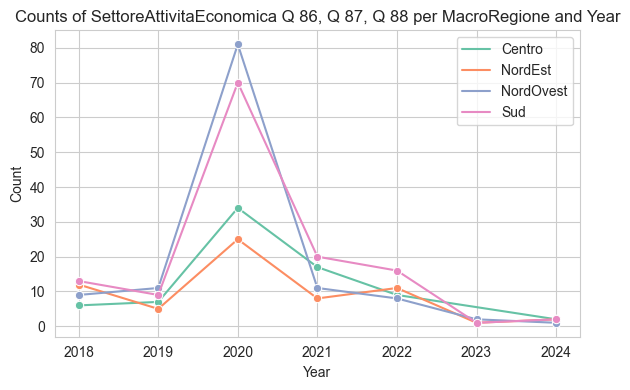

In [ ]:
# Set up the plot
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

# Plot counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year
sns.lineplot(x='DataAccadimento', y='Count', hue='MacroRegione', data=sector_counts, marker='o', palette='Set2')

# Set plot title and labels
plt.title('Counts of SettoreAttivitaEconomica Q 86, Q 87, Q 88 per MacroRegione and Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 2. Dati ISTAT

In [85]:
# Specifica il percorso del file CSV
file_path = 'dati-istat/occupazione-italia-2016-2024.csv'

# Carica il file CSV in un DataFrame
occupazione_df = pd.read_csv(file_path)

# Assuming occupazione_df is already defined
regions_to_remove = ['Nord-est', 'Nord-ovest', 'Centro', 'Mezzogiorno', 'Italia', 'Nord', 'Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento']

# Remove rows where the value in 'Territorio' is in regions_to_remove
occupazione_df = occupazione_df[~occupazione_df['Territorio'].isin(regions_to_remove)]



In [86]:
occupazione_df['Territorio'].unique()

array(['Piemonte', 'Lombardia', "Valle d'Aosta / Vallée d'Aoste",
       'Liguria', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Lazio', 'Toscana',
       'Umbria', 'Marche', 'Sicilia', 'Basilicata', 'Sardegna', 'Molise',
       'Calabria', 'Abruzzo', 'Puglia', 'Campania'], dtype=object)

In [87]:
import pandas as pd

# Assuming occupazione_df is already defined
# Modify specified values in the 'Territorio' column
occupazione_df['Territorio'] = occupazione_df['Territorio'].replace({
    "Valle d'Aosta / Vallée d'Aoste": "Valle D'Aosta",
    "Trentino Alto Adige / Südtirol": "Trentino Alto Adige",
    "Emilia-Romagna": "Emilia Romagna",
    "Friuli-Venezia Giulia": "Friuli Venezia Giulia"

})

# Define the mapping for macroregion
macroregione_mapping = {
    "Valle D'Aosta": 'NordOvest',
    'Piemonte': 'NordOvest',
    'Liguria': 'NordOvest',
    'Lombardia': 'NordOvest',
    'Veneto': 'NordEst',
    'Trentino Alto Adige': 'NordEst',
    'Friuli Venezia Giulia': 'NordEst',
    'Emilia Romagna': 'NordEst',
    'Toscana': 'Centro',
    'Lazio': 'Centro',
    'Umbria': 'Centro',
    'Marche': 'Centro',
    'Puglia': 'Sud',
    'Campania': 'Sud',
    'Calabria': 'Sud',
    'Basilicata': 'Sud',
    'Abruzzo': 'Sud',
    'Molise': 'Sud',
    'Sicilia': 'Sud'
}

# Create a new column 'MacrRegione' based on the mapping
occupazione_df['MacroRegione'] = occupazione_df['Territorio'].map(macroregione_mapping)




In [88]:
# Filter the DataFrame based on the specified conditions
campania_df = occupazione_df[
    (occupazione_df['Classe di età'].isin(['15-64 anni', '15 anni e più'])) &
    (occupazione_df['Sesso'] == 'femmine') &
    (occupazione_df['Territorio'] == 'Friuli Venezia Giulia') &
    (occupazione_df['TIME'] == '2018')&
    (occupazione_df['Condizione professionale europea'] == 'occupati')
]

# Display the filtered DataFrame
campania_df

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,CONDIZIONE_PROF_EU,Condizione professionale europea,TIME,Seleziona periodo,Value,Flag Codes,Flags,MacroRegione
14532,ITD4,Friuli Venezia Giulia,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y_GE15,15 anni e più,EMP,occupati,2018,2018,225.075,NaN,NaN,NordEst
14728,ITD4,Friuli Venezia Giulia,POP,popolazione 0 anni e più (in migliaia),2,femmine,Y15-64,15-64 anni,EMP,occupati,2018,2018,220.569,NaN,NaN,NordEst


In [89]:
# occupazione_df # Assuming occupazione_df is already defined
occupazione_df = occupazione_df.drop(columns=[
    'ITTER107', 'TIPO_DATO_FOL', 'Tipo dato', 'SEXISTAT1', 'ETA1', 'CONDIZIONE_PROF_EU', 'TIME', 'Flag Codes', 'Flags'
])

In [90]:
occupazione_df['Classe di età'].unique()

array(['15-74 anni', '15-64 anni', '0-14 anni', '15 anni e più',
       '15-89 anni'], dtype=object)

In [91]:

# Replace values in 'Classe di età' column
occupazione_df['Classe di età'] = occupazione_df['Classe di età'].replace({
    '15-64 anni': '15-64',
    '0-14 anni': '0-14',
    '15 anni e più': '15+'
})

# Filter rows with desired categories and drop the rest
desired_categories = ['15-64', '0-14', '15+']
occupazione_df = occupazione_df[occupazione_df['Classe di età'].isin(desired_categories)]


In [92]:
# Step 3: Keep only rows where the 'TIME' column has values with 4 characters
occupazione_df = occupazione_df[occupazione_df['Seleziona periodo'].str.len() == 4]

# Determine the number of decimal places to keep (here we use 2 for the example)
decimal_places = 3

# Convert the 'Value' column to string with the specified number of decimal places
occupazione_df['Value'] = occupazione_df['Value'].apply(lambda x: f"{x:.{decimal_places}f}")

occupazione_df['Value'] = occupazione_df['Value'].astype(str).str.replace('.', '')


# Step 5: Remove dot in 'Value' column
occupazione_df['Value'] = occupazione_df['Value'].astype(str).str.replace('.', '')

# # Step 6: Apply padding with '0' for 'Value' column when 'Territorio' is 'Total'
# filtered_df.loc[filtered_df['Territorio'] == 'Total', 'Value'] = filtered_df.loc[filtered_df['Territorio'] == 'Total', 'Value'].apply(lambda x: x.ljust(8, '0'))

# Step 7: cange sesso
# Remove rows where the value in 'Sesso' is 'totale'
occupazione_df = occupazione_df[occupazione_df['Sesso'] != 'totale']

# Replace 'maschi' with 'M' and 'femmine' with 'F'
occupazione_df['Sesso'] = occupazione_df['Sesso'].replace({
    'maschi': 'M',
    'femmine': 'F'
})

# Step 8: Save only 'occupati
cleaned_df = occupazione_df[occupazione_df['Condizione professionale europea'].isin(['occupati'])]

cleaned_df = cleaned_df.rename(columns={
    'Territorio': 'DescrRegione',
    'Sesso': 'Genere',
    'Classe di età': 'AgeGroup',
    'Condizione professionale europea': 'Condizione professionale europea',
    'Seleziona periodo': 'Year',
    'Value': 'Occupati'
})

occupati_df = cleaned_df



In [93]:
occupati_df[occupati_df['DescrRegione']== 'Total']


,DescrRegione,Genere,AgeGroup,Condizione professionale europea,Year,Occupati,MacroRegione


## Creare sotto tabelle di occupati_df

### occupati per anno

In [94]:
import pandas as pd

# Assuming occupati_df is already defined
# Filter rows where AgeGroup is '15+'
filtered_df = occupati_df[occupati_df['AgeGroup'] == '15+']

# Ensure 'Occupati' column is numeric
filtered_df['Occupati'] = pd.to_numeric(filtered_df['Occupati'], errors='coerce')

# Group by 'Year' and 'DescrRegione' and sum the 'Occupati'
occupati_per_year = filtered_df.groupby(['Year', 'DescrRegione'], as_index=False)['Occupati'].sum()

# Calculate the total value for each year across all regions
total_per_year_all_regions = occupati_per_year.groupby('Year', as_index=False)['Occupati'].sum()
total_per_year_all_regions['DescrRegione'] = 'Total'

# Combine the specific region data with the total data
occupati_per_year = pd.concat([occupati_per_year, total_per_year_all_regions], ignore_index=True)

# Print the results



C:\Users\danie\AppData\Local\Temp\ipykernel_24884\1940775043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Occupati'] = pd.to_numeric(filtered_df['Occupati'], errors='coerce')


In [95]:
occupati_per_year

,Year,DescrRegione,Occupati
0,2018,Abruzzo,493923
1,2018,Basilicata,185328
2,2018,Calabria,540555
3,2018,Campania,1640948
4,2018,Emilia Romagna,1996335
...,...,...,...
121,2019,Total,23109405
122,2020,Total,22385258
123,2021,Total,22553956
124,2022,Total,23099391


### occupati per genere

In [96]:
# Ensure 'Occupati' column is numeric
occupati_df['Occupati'] = pd.to_numeric(occupati_df['Occupati'], errors='coerce')

# Filter rows where 'AgeGroup' is '15+'
filtered_occupati_df = occupati_df[occupati_df['AgeGroup'] == '15+']

# Group by 'Year', 'DescrRegione', and 'Genere' and sum the 'Occupati'
occupati_per_genere = filtered_occupati_df.groupby(['Year', 'DescrRegione', 'Genere'], as_index=False)['Occupati'].sum()

# Calculate the total value for each year across all regions for both genders
total_per_year_all_regions_F = occupati_per_genere[occupati_per_genere['Genere'] == 'F'].groupby('Year', as_index=False)['Occupati'].sum()
total_per_year_all_regions_F['DescrRegione'] = 'Total'
total_per_year_all_regions_F['Genere'] = 'F'

total_per_year_all_regions_M = occupati_per_genere[occupati_per_genere['Genere'] == 'M'].groupby('Year', as_index=False)['Occupati'].sum()
total_per_year_all_regions_M['DescrRegione'] = 'Total'
total_per_year_all_regions_M['Genere'] = 'M'

# Combine the specific region data with the total data
occupati_per_genere = pd.concat([occupati_per_genere, total_per_year_all_regions_F, total_per_year_all_regions_M], ignore_index=True)


In [97]:
occupati_per_genere[occupati_per_genere['DescrRegione'] == 'Total']

,Year,DescrRegione,Genere,Occupati
240,2018,Total,F,9676501
241,2019,Total,F,9773767
242,2020,Total,F,9397844
243,2021,Total,F,9510352
244,2022,Total,F,9749198
245,2023,Total,F,9988556
246,2018,Total,M,13282227
247,2019,Total,M,13335638
248,2020,Total,M,12987414
249,2021,Total,M,13043604


### occupiti per età

In [98]:

# Assuming occupati_df is already defined and imported

# Ensure 'Occupati' column is numeric
occupati_df['Occupati'] = pd.to_numeric(occupati_df['Occupati'], errors='coerce')

# Group by 'Year', 'DescrRegione', and 'AgeGroup' and sum the 'Occupati'
occupati_per_eta = occupati_df.groupby(['Year', 'DescrRegione', 'AgeGroup'], as_index=False)['Occupati'].sum()

# Create DataFrames for AgeGroups '15+' and '15-64'
age_15_plus = occupati_per_eta[occupati_per_eta['AgeGroup'] == '15+'].copy()
age_15_64 = occupati_per_eta[occupati_per_eta['AgeGroup'] == '15-64'].copy()

# Merge the two DataFrames on 'Year' and 'DescrRegione'
merged_age_groups = pd.merge(age_15_plus, age_15_64, on=['Year', 'DescrRegione'], suffixes=('_15_plus', '_15_64'))

# Calculate the '65+' age group as the difference between '15+' and '15-64'
merged_age_groups['Occupati_65_plus'] = merged_age_groups['Occupati_15_plus'] - merged_age_groups['Occupati_15_64']
merged_age_groups['AgeGroup'] = '65+'

# Create the final DataFrame with 'Year', 'DescrRegione', 'AgeGroup', and 'Occupati'
age_65_plus_df = merged_age_groups[['Year', 'DescrRegione', 'AgeGroup', 'Occupati_65_plus']]
age_65_plus_df.rename(columns={'Occupati_65_plus': 'Occupati'}, inplace=True)

# Append the new '65+' rows to the original DataFrame
occupati_per_eta = pd.concat([occupati_per_eta, age_65_plus_df], ignore_index=True)

# Calculate total for each AgeGroup per Year
totals_per_year = occupati_per_eta.groupby(['Year', 'AgeGroup'], as_index=False)['Occupati'].sum()
totals_per_year['DescrRegione'] = 'Total'

# Append the total rows to the original DataFrame
occupati_per_eta = pd.concat([occupati_per_eta, totals_per_year], ignore_index=True)

# Sort the DataFrame by Year, DescrRegione, and AgeGroup for better readability
occupati_per_eta = occupati_per_eta.sort_values(by=['Year', 'DescrRegione', 'AgeGroup'])




C:\Users\danie\AppData\Local\Temp\ipykernel_24884\4002325204.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_65_plus_df.rename(columns={'Occupati_65_plus': 'Occupati'}, inplace=True)


In [99]:
occupati_per_eta[occupati_per_eta['DescrRegione']=='Total']

,Year,DescrRegione,AgeGroup,Occupati
360,2018,Total,15+,22958728
361,2018,Total,15-64,22332614
362,2018,Total,65+,626114
363,2019,Total,15+,23109405
364,2019,Total,15-64,22442714
365,2019,Total,65+,666691
366,2020,Total,15+,22385258
367,2020,Total,15-64,21721015
368,2020,Total,65+,664243
369,2021,Total,15+,22553956


## 1. In base agli occupati

### 1. Totale

#### feriti

In [100]:
# Ensure the 'Year' columns in both DataFrames are of the same type
injury_per_year_region['Year'] = injury_per_year_region['Year'].astype(int)
occupati_per_year['Year'] = occupati_per_year['Year'].astype(int)

# Merge the DataFrames on DescrRegione and Year
occupation_injury_per_year_region = pd.merge(injury_per_year_region, occupati_per_year, on=['DescrRegione', 'Year'], how='inner')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_region['Count'] = pd.to_numeric(occupation_injury_per_year_region['Count'], errors='coerce')
occupation_injury_per_year_region['Occupati'] = pd.to_numeric(occupation_injury_per_year_region['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'IncidentiPerOccupati'
occupation_injury_per_year_region['IncidentiPerOccupati'] = (occupation_injury_per_year_region['Count'] / occupation_injury_per_year_region['Occupati']) * 100


In [101]:
feriti_totali = occupation_injury_per_year_region

In [102]:
feriti_totali[feriti_totali['MacroRegione']=='Total']

,DescrRegione,MacroRegione,Year,Count,Occupati,IncidentiPerOccupati
113,Total,Total,2018,631702,22958728,2.751468
114,Total,Total,2019,631147,23109405,2.731126
115,Total,Total,2020,560937,22385258,2.505832
116,Total,Total,2021,552963,22553956,2.451734
117,Total,Total,2022,689194,23099391,2.983602
118,Total,Total,2023,211604,23579947,0.897390


#### morti

In [103]:
# Merge the DataFrames on DescrRegione, MacroRegione, and Year
occupation_deaths_per_year_region = pd.merge(deaths_year_per_region, occupati_per_year, on=['DescrRegione', 'Year'], how='inner')

# Merge the DataFrames on DescrRegione and Year
occupation_deaths_per_year_region = pd.merge(deaths_year_per_region, occupati_per_year, on=['DescrRegione', 'Year'], how='inner')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_deaths_per_year_region['Count'] = pd.to_numeric(occupation_deaths_per_year_region['Count'], errors='coerce')
occupation_deaths_per_year_region['Occupati'] = pd.to_numeric(occupation_deaths_per_year_region['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'IncidentiPerOccupati'
occupation_deaths_per_year_region['PercentageOccupati'] = (occupation_deaths_per_year_region['Count'] / occupation_deaths_per_year_region['Occupati']) * 100



In [104]:
morti_totali = occupation_deaths_per_year_region

In [105]:
morti_totali= occupation_deaths_per_year_region
morti_totali[morti_totali['DescrRegione']== 'Total']

,DescrRegione,MacroRegione,Year,Count,Occupati,PercentageOccupati
112,Total,Total,2018,1271,22958728,0.005536
113,Total,Total,2019,1216,23109405,0.005262
114,Total,Total,2020,1689,22385258,0.007545
115,Total,Total,2021,1402,22553956,0.006216
116,Total,Total,2022,1216,23099391,0.005264
117,Total,Total,2023,318,23579947,0.001349


### 2 Per età

#### feriti

In [106]:
import pandas as pd

# Assuming occupati_per_eta and injury_per_year_region_age are already defined

# Ensure the 'Year' columns in both DataFrames are of the same type
occupati_per_eta['Year'] = occupati_per_eta['Year'].astype(int)
injury_per_year_region_age['Year'] = injury_per_year_region_age['Year'].astype(int)

# Merge the DataFrames on Year, DescrRegione, and AgeGroup
occupation_injury_per_year_age = pd.merge(occupati_per_eta, injury_per_year_region_age, on=['Year', 'DescrRegione', 'AgeGroup'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_age['Count'] = pd.to_numeric(occupation_injury_per_year_age['Count'], errors='coerce')
occupation_injury_per_year_age['Occupati'] = pd.to_numeric(occupation_injury_per_year_age['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_injury_per_year_age['PercentageOccupati'] = (occupation_injury_per_year_age['Count'] / occupation_injury_per_year_age['Occupati']) * 100

# Function to update 'MacroRegione' based on conditions
def update_macroregion(row):
    if pd.isna(row['MacroRegione']) and row['DescrRegione'] == 'Total':
        return 'Total'
    else:
        return row['MacroRegione']

# Apply the function to update 'MacroRegione'
occupation_injury_per_year_age['MacroRegione'] = occupation_injury_per_year_age.apply(update_macroregion, axis=1)

# Fill NaN values with empty strings (though it's redundant after updating 'MacroRegione')
occupation_injury_per_year_age = occupation_injury_per_year_age.fillna(0)



In [107]:
feriti_eta = occupation_injury_per_year_age

feriti_eta[feriti_eta['MacroRegione'] == 0]

,Year,DescrRegione,AgeGroup,Occupati,MacroRegione,Count,Percentage,PercentageOccupati
52,2018,Sardegna,15+,573750.0,0,0.0,0.0,0.0
53,2018,Sardegna,15-64,557293.0,0,0.0,0.0,0.0
54,2018,Sardegna,65+,16457.0,0,0.0,0.0,0.0
135,2019,Sardegna,15+,582033.0,0,0.0,0.0,0.0
136,2019,Sardegna,15-64,562854.0,0,0.0,0.0,0.0
137,2019,Sardegna,65+,19179.0,0,0.0,0.0,0.0
218,2020,Sardegna,15+,551740.0,0,0.0,0.0,0.0
219,2020,Sardegna,15-64,535237.0,0,0.0,0.0,0.0
220,2020,Sardegna,65+,16503.0,0,0.0,0.0,0.0
301,2021,Sardegna,15+,563197.0,0,0.0,0.0,0.0


#### morti

In [108]:
import pandas as pd

# Assuming occupati_per_eta and deaths_per_year_region_age are already defined

# Merge the DataFrames on Year, DescrRegione, and AgeGroup
occupation_death_per_year_age = pd.merge(occupati_per_eta, deaths_per_year_region_age, on=['Year', 'DescrRegione', 'AgeGroup'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_death_per_year_age['Count'] = pd.to_numeric(occupation_death_per_year_age['Count'], errors='coerce')
occupation_death_per_year_age['Occupati'] = pd.to_numeric(occupation_death_per_year_age['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_death_per_year_age['PercentageOccupati'] = (occupation_death_per_year_age['Count'] / occupation_death_per_year_age['Occupati']) * 100

# Function to update 'MacroRegione' based on conditions
def update_macroregion(row):
    if pd.isna(row['MacroRegione']) and row['DescrRegione'] == 'Total':
        return 'Total'
    else:
        return row['MacroRegione']

# Apply the function to update 'MacroRegione'
occupation_death_per_year_age['MacroRegione'] = occupation_death_per_year_age.apply(update_macroregion, axis=1)

# Fill NaN values with empty strings (though it's redundant after updating 'MacroRegione')
occupation_death_per_year_age = occupation_death_per_year_age.fillna(0)



In [109]:
morti_eta= occupation_death_per_year_age

morti_eta[morti_eta['DescrRegione']== 'Total']

,Year,DescrRegione,AgeGroup,Occupati,MacroRegione,Count,Percentage,PercentageOccupati
49,2018,Total,0-14,0.0,Total,1.0,0.026233,0.000000
50,2018,Total,15+,22958728.0,Total,0.0,0.000000,0.000000
51,2018,Total,15-64,22332614.0,Total,1171.0,30.718783,0.005243
52,2018,Total,65+,626114.0,Total,99.0,2.597062,0.015812
115,2019,Total,0-14,0.0,Total,3.0,0.082305,0.000000
116,2019,Total,15+,23109405.0,Total,0.0,0.000000,0.000000
117,2019,Total,15-64,22442714.0,Total,1124.0,30.836763,0.005008
118,2019,Total,65+,666691.0,Total,89.0,2.441701,0.013350
181,2020,Total,0-14,0.0,Total,3.0,0.059242,0.000000
182,2020,Total,15+,22385258.0,Total,0.0,0.000000,0.000000


## 3. Mortalità 



In [110]:
mortalita_df = merged_counts
mortalita_df

,MacroRegione,DescrRegione,Year,TotalDataAccadimento,TotalDataMorte,MorteOgniMilleIncidenti,PercentageMorteAccadimento
0,Centro,Lazio,2018,45031,104,2.309520,0.230952
1,Centro,Lazio,2019,45318,111,2.449358,0.244936
2,Centro,Lazio,2020,37097,145,3.908672,0.390867
3,Centro,Lazio,2021,37708,141,3.739260,0.373926
4,Centro,Lazio,2022,54411,121,2.223815,0.222382
...,...,...,...,...,...,...,...
154,Sud,Total,2020,94203,490,5.201533,0.520153
155,Sud,Total,2021,94775,485,5.117383,0.511738
156,Sud,Total,2022,128562,338,2.629082,0.262908
157,Sud,Total,2023,42041,100,2.378630,0.237863


In [111]:
# Ensure 'Year' columns are integers
occupati_per_year['Year'] = pd.to_numeric(occupati_per_year['Year'], errors='coerce').astype('Int64')
mortalita_df['Year'] = pd.to_numeric(mortalita_df['Year'], errors='coerce').astype('Int64')

# Merge the DataFrames on 'DescrRegione' and 'Year'
merged_occupati_mortalita = pd.merge(occupati_per_year, mortalita_df, on=['DescrRegione', 'Year'], how='inner')

# Ensure 'TotalDataMorte' and 'Occupati' columns are numeric
merged_occupati_mortalita['TotalDataMorte'] = pd.to_numeric(merged_occupati_mortalita['TotalDataMorte'], errors='coerce')
merged_occupati_mortalita['Occupati'] = pd.to_numeric(merged_occupati_mortalita['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
merged_occupati_mortalita['Morti per occupati'] = (merged_occupati_mortalita['TotalDataMorte'] / merged_occupati_mortalita['Occupati']) * 100

# Calculate the percentage and add it as a new column 'PercentageOccupati'
merged_occupati_mortalita['Incidenti su morti'] = (merged_occupati_mortalita['TotalDataAccadimento'] / merged_occupati_mortalita['Occupati']) * 100


# Fill NaN values with empty strings
merged_occupati_mortalita = merged_occupati_mortalita.fillna('')


In [112]:
mortalita = merged_occupati_mortalita

mortalita[]

SyntaxError: invalid syntax (323403453.py, line 3)

## 4. Per genere

### feriti

In [113]:

import pandas as pd

# Assuming occupati_per_genere and accidents_per_year_gender are already defined

# Ensure the 'Year' columns in both DataFrames are of the same type
occupati_per_genere['Year'] = occupati_per_genere['Year'].astype(int)
accidents_per_year_gender['Year'] = accidents_per_year_gender['Year'].astype(int)

# Merge the DataFrames on 'Year', 'DescrRegione', and 'Genere'
occupation_injury_per_year_gender = pd.merge(occupati_per_genere, accidents_per_year_gender, on=['Year', 'DescrRegione', 'Genere'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_gender['Count'] = pd.to_numeric(occupation_injury_per_year_gender['Count'], errors='coerce')
occupation_injury_per_year_gender['Occupati'] = pd.to_numeric(occupation_injury_per_year_gender['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_injury_per_year_gender['PercentageOccupati'] = (occupation_injury_per_year_gender['Count'] / occupation_injury_per_year_gender['Occupati']) * 100

# Function to update 'MacroRegione' based on conditions
def update_macroregion(row):
    if pd.isna(row['MacroRegione']) and row['DescrRegione'] == 'Total':
        return 'Total'
    else:
        return row['MacroRegione']

# Apply the function to update 'MacroRegione'
occupation_injury_per_year_gender['MacroRegione'] = occupation_injury_per_year_gender.apply(update_macroregion, axis=1)

# Fill NaN values with empty strings (though it's redundant after updating 'MacroRegione')
occupation_injury_per_year_gender = occupation_injury_per_year_gender.fillna(0)



In [114]:
feriti_genere = occupation_injury_per_year_gender

feriti_genere[feriti_genere['DescrRegione']== 'Total']

,Year,DescrRegione,Genere,Occupati,MacroRegione,Count,Percentage,PercentageOccupati
32,2018,Total,F,9676501.0,Total,225467.0,17.845994,2.330047
33,2018,Total,M,13282227.0,Total,406235.0,32.154006,3.058486
74,2019,Total,F,9773767.0,Total,225904.0,17.896306,2.311330
75,2019,Total,M,13335638.0,Total,405243.0,32.103694,3.038797
116,2020,Total,F,9397844.0,Total,240271.0,21.416933,2.556661
117,2020,Total,M,12987414.0,Total,320666.0,28.583067,2.469052
158,2021,Total,F,9510352.0,Total,201451.0,18.215595,2.118229
159,2021,Total,M,13043604.0,Total,351512.0,31.784405,2.694899
200,2022,Total,F,9749198.0,Total,282783.0,20.515486,2.900577
201,2022,Total,M,13350193.0,Total,406411.0,29.484514,3.044233


 ### morti

In [115]:
deaths_per_year_gender

,DescrRegione,MacroRegione,Year,Genere,Count,Percentage
0,Abruzzo,Sud,2018,F,3,0.118017
1,Abruzzo,Sud,2018,M,27,1.062156
2,Abruzzo,Sud,2019,F,2,0.082237
3,Abruzzo,Sud,2019,M,33,1.356908
4,Abruzzo,Sud,2020,F,7,0.207223
...,...,...,...,...,...,...
240,Total,Total,2022,M,1084,44.572368
241,Total,Total,2023,F,27,4.245283
242,Total,Total,2023,M,291,45.754717
243,Total,Total,2024,F,29,4.239766


In [116]:
import pandas as pd

# Assuming occupati_per_genere and deaths_per_year_gender are already defined

# Merge the DataFrames on 'Year', 'DescrRegione', and 'Genere'
occupation_death_per_year_gender = pd.merge(occupati_per_genere, deaths_per_year_gender, on=['Year', 'DescrRegione', 'Genere'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_death_per_year_gender['Count'] = pd.to_numeric(occupation_death_per_year_gender['Count'], errors='coerce')
occupation_death_per_year_gender['Occupati'] = pd.to_numeric(occupation_death_per_year_gender['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_death_per_year_gender['PercentageOccupati'] = (occupation_death_per_year_gender['Count'] / occupation_death_per_year_gender['Occupati']) * 100

# Function to update 'MacroRegione' based on conditions
def update_macroregion(row):
    if pd.isna(row['MacroRegione']) and row['DescrRegione'] == 'Total':
        return 'Total'
    else:
        return row['MacroRegione']

# Apply the function to update 'MacroRegione'
occupation_death_per_year_gender['MacroRegione'] = occupation_death_per_year_gender.apply(update_macroregion, axis=1)

# Fill NaN values with empty strings (though it's redundant after updating 'MacroRegione')
occupation_death_per_year_gender = occupation_death_per_year_gender.fillna(0)




In [117]:
morti_genere = occupation_death_per_year_gender
morti_genere[morti_genere['DescrRegione']=='Total']

,Year,DescrRegione,Genere,Occupati,MacroRegione,Count,Percentage,PercentageOccupati
32,2018,Total,F,9676501.0,Total,117.0,4.602675,0.001209
33,2018,Total,M,13282227.0,Total,1154.0,45.397325,0.008688
74,2019,Total,F,9773767.0,Total,100.0,4.111842,0.001023
75,2019,Total,M,13335638.0,Total,1116.0,45.888158,0.008369
116,2020,Total,F,9397844.0,Total,188.0,5.565423,0.002000
117,2020,Total,M,12987414.0,Total,1501.0,44.434577,0.011557
158,2021,Total,F,9510352.0,Total,150.0,5.349501,0.001577
159,2021,Total,M,13043604.0,Total,1252.0,44.650499,0.009599
200,2022,Total,F,9749198.0,Total,132.0,5.427632,0.001354
201,2022,Total,M,13350193.0,Total,1084.0,44.572368,0.008120


## 5. Nazionalità

### feriti

In [118]:
import pandas as pd

# Assuming occupati_per_year and final_df are already defined

# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_injury_per_year_nationality = pd.merge(occupati_per_year, final_df, on=['Year', 'DescrRegione'], how='inner')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_nationality['Count'] = pd.to_numeric(occupation_injury_per_year_nationality['Count'], errors='coerce')
occupation_injury_per_year_nationality['Occupati'] = pd.to_numeric(occupation_injury_per_year_nationality['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_injury_per_year_nationality['PercentageOccupati'] = (occupation_injury_per_year_nationality['Count'] / occupation_injury_per_year_nationality['Occupati']) * 100

# Function to update 'MacroRegione' based on conditions
def update_macroregion(row):
    if pd.isna(row['MacroRegione']) and row['DescrRegione'] == 'Total':
        return 'Total'
    else:
        return row['MacroRegione']

# Apply the function to update 'MacroRegione'
occupation_injury_per_year_nationality['MacroRegione'] = occupation_injury_per_year_nationality.apply(update_macroregion, axis=1)

# Fill NaN values with 0 (though it's redundant after updating 'MacroRegione')
occupation_injury_per_year_nationality = occupation_injury_per_year_nationality.fillna(0)



In [119]:
filtered_df_final = final_df[final_df['DescrRegione']== 'Total']
filtered_df_final[filtered_df_final['Year']== 2018]

,MacroRegione,DescrRegione,Year,Nazionalità,Count,Percentage
262,Total,Total,2018,0,104539,5.516261
263,Total,Total,2018,1,527163,27.817072


In [120]:
feriti_nazionalita = occupation_injury_per_year_nationality
feriti_nazionalita[feriti_nazionalita['DescrRegione']== 'Total']

,Year,DescrRegione,Occupati,MacroRegione,Nazionalità,Count,Percentage,PercentageOccupati
226,2018,Total,22958728,Total,0,104539,5.516261,0.455334
227,2018,Total,22958728,Total,1,527163,27.817072,2.296133
228,2019,Total,23109405,Total,0,108082,5.708232,0.467697
229,2019,Total,23109405,Total,1,523065,27.625102,2.263429
230,2020,Total,22385258,Total,0,99132,5.890858,0.442845
231,2020,Total,22385258,Total,1,461805,27.442476,2.062987
232,2021,Total,22553956,Total,0,102193,6.160328,0.453105
233,2021,Total,22553956,Total,1,450770,27.173006,1.998629
234,2022,Total,23099391,Total,0,122212,5.910866,0.529070
235,2022,Total,23099391,Total,1,566982,27.422467,2.454532


### morti

In [121]:
death_final_df

,MacroRegione,DescrRegione,Year,Nazionalità,Count,Percentage
0,Centro,Lazio,2018,0,18,NaN
1,Centro,Lazio,2018,1,88,NaN
2,Centro,Lazio,2019,0,16,NaN
3,Centro,Lazio,2019,1,98,NaN
4,Centro,Lazio,2020,0,22,NaN
...,...,...,...,...,...,...
258,Total,Total,2022,1,976,26.754386
259,Total,Total,2023,0,54,5.660377
260,Total,Total,2023,1,264,27.672956
261,Total,Total,2024,0,73,7.115010


In [122]:
# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_death_per_year_nationality = pd.merge(occupati_per_year, death_final_df, on=['Year', 'DescrRegione'], how='inner')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_death_per_year_nationality['Count'] = pd.to_numeric(occupation_death_per_year_nationality['Count'], errors='coerce')
occupation_death_per_year_nationality['Occupati'] = pd.to_numeric(occupation_death_per_year_nationality['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_death_per_year_nationality['PercentageOccupati'] = (occupation_death_per_year_nationality['Count'] / occupation_death_per_year_nationality['Occupati']) * 100

# Fill NaN values with empty strings
occupation_death_per_year_nationality = occupation_death_per_year_nationality.fillna('')


In [123]:
morti_nazionalita = occupation_death_per_year_nationality

morti_nazionalita

,Year,DescrRegione,Occupati,MacroRegione,Nazionalità,Count,Percentage,PercentageOccupati
0,2018,Abruzzo,493923,Sud,0,3,,0.000607
1,2018,Abruzzo,493923,Sud,1,27,,0.005466
2,2018,Basilicata,185328,Sud,0,8,,0.004317
3,2018,Basilicata,185328,Sud,1,16,,0.008633
4,2018,Calabria,540555,Sud,0,4,,0.000740
...,...,...,...,...,...,...,...,...
222,2021,Total,22553956,Total,1,1182,28.10271,0.005241
223,2022,Total,23099391,Total,0,240,6.578947,0.001039
224,2022,Total,23099391,Total,1,976,26.754386,0.004225
225,2023,Total,23579947,Total,0,54,5.660377,0.000229


## 6. Per attività produttiva

In [124]:
# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_injury_per_year_job = pd.merge(occupati_per_year, accidents_per_year_job, on=['Year', 'DescrRegione'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_job['Count'] = pd.to_numeric(occupation_injury_per_year_job['Count'], errors='coerce')
occupation_injury_per_year_job['Occupati'] = pd.to_numeric(occupation_injury_per_year_job['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_injury_per_year_job['PercentageOccupati'] = (occupation_injury_per_year_job['Count'] / occupation_injury_per_year_job['Occupati']) * 100

# Fill NaN values with empty strings
occupation_injury_per_year_job = occupation_injury_per_year_job.fillna(0)


In [125]:
feriti_lavoro = occupation_injury_per_year_job

feriti_lavoro[feriti_lavoro['DescrRegione']== 'Total']

,Year,DescrRegione,Occupati,MacroRegione,DescrAtecoLiv1,Settore,Count,Percentage,PercentageOccupati
314,2018,Total,22958728.0,Total,"Agricoltura, silvicoltura e pesca",Primario,1292.0,0.102263,0.005627
315,2018,Total,22958728.0,Total,Altre attivita' di servizi,Terziario,6151.0,0.486859,0.026792
316,2018,Total,22958728.0,Total,"Amministrazione pubblica e difesa, assicurazio...",Terziario,13996.0,1.107801,0.060962
317,2018,Total,22958728.0,Total,"Attivita' artistiche, sportive, di intrattenim...",Terziario,4264.0,0.337501,0.018572
318,2018,Total,22958728.0,Total,Attivita' dei servizi di alloggio e di ristora...,Terziario,30118.0,2.383877,0.131183
...,...,...,...,...,...,...,...,...,...
2948,2024,Total,0.0,Total,Non determinato,Terziario,92592.0,0.000000,0.000000
2949,2024,Total,0.0,Total,Organizzazioni ed organismi extraterritoriali,Terziario,16.0,0.000000,0.000000
2950,2024,Total,0.0,Total,Sanita' e assistenza sociale,Terziario,16660.0,0.000000,0.000000
2951,2024,Total,0.0,Total,Servizi di informazione e comunicazione,Terziario,1430.0,0.000000,0.000000


### feriti per settore

In [126]:
import pandas as pd

# Assuming 'occupati_per_year' and 'settore_year_counts' DataFrames are already defined

# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_injury_per_year_settore = pd.merge(occupati_per_year, settore_year_counts, on=['Year', 'DescrRegione'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_injury_per_year_settore['Count'] = pd.to_numeric(occupation_injury_per_year_settore['Count'], errors='coerce')
occupation_injury_per_year_settore['Occupati'] = pd.to_numeric(occupation_injury_per_year_settore['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_injury_per_year_settore['PercentageOccupati'] = (occupation_injury_per_year_settore['Count'] / occupation_injury_per_year_settore['Occupati']) * 100

# Fill NaN values with empty strings
occupation_injury_per_year_settore = occupation_injury_per_year_settore.fillna(0)




In [127]:
feriti_settore = occupation_injury_per_year_settore
feriti_settore[feriti_settore['DescrRegione']=='Total']

,Year,DescrRegione,Occupati,MacroRegione,Settore,Count,Percentage,PercentageOccupati
46,2018,Total,22958728.0,Total,Primario,1808.0,0.286211,0.007875
47,2018,Total,22958728.0,Total,Secondario,155770.0,24.658779,0.678478
48,2018,Total,22958728.0,Total,Terziario,474124.0,75.055010,2.065114
107,2019,Total,23109405.0,Total,Primario,1633.0,0.258735,0.007066
108,2019,Total,23109405.0,Total,Secondario,156210.0,24.750177,0.675959
109,2019,Total,23109405.0,Total,Terziario,473304.0,74.991088,2.048101
167,2020,Total,22385258.0,Total,Primario,1496.0,0.266697,0.006683
168,2020,Total,22385258.0,Total,Secondario,117647.0,20.973300,0.525556
169,2020,Total,22385258.0,Total,Terziario,441794.0,78.760003,1.973594
228,2021,Total,22553956.0,Total,Primario,1488.0,0.269096,0.006598


### morti

In [128]:
# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_deaths_per_year_job = pd.merge(occupati_per_year, deaths_per_year_job, on=['Year', 'DescrRegione'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_deaths_per_year_job['Count'] = pd.to_numeric(occupation_deaths_per_year_job['Count'], errors='coerce')
occupation_deaths_per_year_job['Occupati'] = pd.to_numeric(occupation_deaths_per_year_job['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_deaths_per_year_job['PercentageOccupati'] = (occupation_deaths_per_year_job['Count'] / occupation_deaths_per_year_job['Occupati']) * 100

# Fill NaN values with empty strings
occupation_deaths_per_year_job = occupation_deaths_per_year_job.fillna(0)


In [129]:
morti_lavoro = occupation_deaths_per_year_job

In [130]:
morti_lavoro[morti_lavoro['DescrRegione']== 'Total']

,Year,DescrRegione,Occupati,MacroRegione,DescrAtecoLiv1,Settore,Count,Percentage,PercentageOccupati
175,2018,Total,22958728.0,Total,"Agricoltura, silvicoltura e pesca",Primario,11.0,0.432730,0.000048
176,2018,Total,22958728.0,Total,Altre attivita' di servizi,Terziario,19.0,0.747443,0.000083
177,2018,Total,22958728.0,Total,"Amministrazione pubblica e difesa, assicurazio...",Terziario,26.0,1.022817,0.000113
178,2018,Total,22958728.0,Total,"Attivita' artistiche, sportive, di intrattenim...",Terziario,7.0,0.275374,0.000030
179,2018,Total,22958728.0,Total,Attivita' dei servizi di alloggio e di ristora...,Terziario,70.0,2.753737,0.000305
...,...,...,...,...,...,...,...,...,...
1427,2024,Total,0.0,Total,Non determinato,Terziario,98.0,14.327485,0.000000
1428,2024,Total,0.0,Total,Organizzazioni ed organismi extraterritoriali,Terziario,1.0,0.146199,0.000000
1429,2024,Total,0.0,Total,Sanita' e assistenza sociale,Terziario,7.0,1.023392,0.000000
1430,2024,Total,0.0,Total,Servizi di informazione e comunicazione,Terziario,5.0,0.730994,0.000000


In [131]:
import pandas as pd

# Assuming 'occupati_per_year' and 'settore_year_counts' DataFrames are already defined

# Merge the DataFrames on 'Year', 'DescrRegione', and 'AgeGroup'
occupation_deaths_per_year_settore = pd.merge(occupati_per_year, deaths_settore_year_counts, on=['Year', 'DescrRegione'], how='outer')

# Ensure 'Count' and 'Occupati' columns are numeric
occupation_deaths_per_year_settore['Count'] = pd.to_numeric(occupation_deaths_per_year_settore['Count'], errors='coerce')
occupation_deaths_per_year_settore['Occupati'] = pd.to_numeric(occupation_deaths_per_year_settore['Occupati'], errors='coerce')

# Calculate the percentage and add it as a new column 'PercentageOccupati'
occupation_deaths_per_year_settore['PercentageOccupati'] = (occupation_deaths_per_year_settore['Count'] / occupation_deaths_per_year_settore['Occupati']) * 100

# Fill NaN values with empty strings
occupation_deaths_per_year_settore = occupation_deaths_per_year_settore.fillna(0)



In [132]:
morti_settore = occupation_deaths_per_year_settore
morti_settore[morti_settore['DescrRegione'] == 'Total']

,Year,DescrRegione,Occupati,MacroRegione,Settore,Count,Percentage,PercentageOccupati
37,2018,Total,22958728.0,Total,Primario,14.0,1.101495,0.000061
38,2018,Total,22958728.0,Total,Secondario,430.0,33.831629,0.001873
39,2018,Total,22958728.0,Total,Terziario,827.0,65.066876,0.003602
88,2019,Total,23109405.0,Total,Primario,16.0,1.315789,0.000069
89,2019,Total,23109405.0,Total,Secondario,469.0,38.569079,0.002029
90,2019,Total,23109405.0,Total,Terziario,731.0,60.115132,0.003163
139,2020,Total,22385258.0,Total,Primario,13.0,0.769686,0.000058
140,2020,Total,22385258.0,Total,Secondario,496.0,29.366489,0.002216
141,2020,Total,22385258.0,Total,Terziario,1180.0,69.863825,0.005271
189,2021,Total,22553956.0,Total,Primario,10.0,0.713267,0.000044


# Salviamo queste tabelle

In [133]:
import pandas as pd

# List of dataframes
dataframes = {
    'feriti_totali': feriti_totali,
    'morti_totali': morti_totali,
    'feriti_eta': feriti_eta,
    'morti_eta': morti_eta,
    'mortalita': mortalita,
    'feriti_genere': feriti_genere,
    'morti_genere': morti_genere,
    'feriti_nazionalita': feriti_nazionalita,
    'morti_nazionalita': morti_nazionalita,
    'feriti_lavoro': feriti_lavoro,
    'feriti_settore': feriti_settore,
    'morti_lavoro': morti_lavoro,
    'morti_settore': morti_settore
}


# Ensure 'Occupati' column is Int32 in each dataframe
for name, df in dataframes.items():
    if 'Occupati' in df.columns:
        df['Occupati'] = pd.to_numeric(df['Occupati'], errors='coerce').astype('Int32')

# Ensure 'Year' column is Int32 in each dataframe
for name, df in dataframes.items():
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int32')

# Ensure 'Value' column in percentage and 'PercentageOccupati' are float64, 'Count' is int64
for name, df in dataframes.items():
    if 'Value' in df.columns:
        df['Value'] = pd.to_numeric(df['Value'].astype(str).str.replace('%', ''), errors='coerce') / 100.0
    if 'PercentageOccupati' in df.columns:
        df['PercentageOccupati'] = pd.to_numeric(df['PercentageOccupati'].astype(str).str.replace('%', ''), errors='coerce') / 100.0
    if 'Percentage' in df.columns:
        df['Percentage'] = pd.to_numeric(df['Percentage'].astype(str).str.replace('%', ''), errors='coerce') / 100.0
    if 'Count' in df.columns:
        df['Count'] = pd.to_numeric(df['Count'], errors='coerce').astype('Int64')

# Initialize a set to collect all unique columns across dataframes
unique_columns = set()

# Iterate over each dataframe and collect unique column names
for name, df in dataframes.items():
    unique_columns.update(df.columns)

# Create an empty list to store rows for the summary dataframe
summary_data = []

# Iterate over each dataframe again to populate the summary dataframe
for name, df in dataframes.items():
    row = {col: df[col].dtype if col in df.columns else '' for col in unique_columns}
    row['File'] = name
    summary_data.append(row)

# Create the summary dataframe
summary_df = pd.DataFrame(summary_data, columns=['File'] + list(unique_columns))

# Display the summary dataframe
summary_df



,File,Occupati,Settore,Year,PercentageMorteAccadimento,Count,MorteOgniMilleIncidenti,Genere,DescrRegione,TotalDataAccadimento,DescrAtecoLiv1,Nazionalità,IncidentiPerOccupati,PercentageOccupati,TotalDataMorte,MacroRegione,AgeGroup,Percentage
0,feriti_totali,Int32,,Int32,,Int64,,,object,,,,float64,,,object,,
1,morti_totali,Int32,,Int32,,Int64,,,object,,,,,float64,,object,,
2,feriti_eta,Int32,,Int32,,Int64,,,object,,,,,float64,,object,object,float64
3,morti_eta,Int32,,Int32,,Int64,,,object,,,,,float64,,object,object,float64
4,mortalita,,,Int32,float64,,float64,,object,int64,,,,,int32,object,,
5,feriti_genere,Int32,,Int32,,Int64,,object,object,,,,,float64,,object,,float64
6,morti_genere,Int32,,Int32,,Int64,,object,object,,,,,float64,,object,,float64
7,feriti_nazionalita,Int32,,Int32,,Int64,,,object,,,int64,,float64,,object,,float64
8,morti_nazionalita,Int32,,Int32,,Int64,,,object,,,int64,,float64,,object,,float64
9,feriti_lavoro,Int32,object,Int32,,Int64,,,object,,object,,,float64,,object,,float64


domani devi:
1. trasformare gli int in float
2. accertarti che tutte le tabelle abbiano vuoti per i nulli
3. traformare gli anni in numeri
4. anonimizzare (scrivere uno script che per ogni tabella nella lista veda i valori di Count, se almeno uno e 1, raggruppi i valori per macro regione e li salvi così. ritorna anche quelli modificati)

## rename columns

In [134]:
import pandas as pd
import os

# Dizionario dei DataFrame originali
dataframes = {
    'feriti_totali': feriti_totali,
    'morti_totali': morti_totali,
    'feriti_eta': feriti_eta,
    'morti_eta': morti_eta,
    'mortalita': mortalita,
    'feriti_genere': feriti_genere,
    'morti_genere': morti_genere,
    'feriti_nazionalita': feriti_nazionalita,
    'morti_nazionalita': morti_nazionalita,
    'feriti_lavoro': feriti_lavoro,
    'feriti_settore': feriti_settore,
    'morti_lavoro': morti_lavoro,
    'morti_settore': morti_settore
}

# Dizionario delle colonne rinominate
rename_columns = {
    'feriti_totali': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'IncidentiPerOccupati': 'Percentuale Occupati'},
    'morti_totali': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'TotaleDataAccadimento': 'Numero Incidenti', 'TotaleDataMorte': 'Numero morti', 'PercentageMorteAccadimento': 'Morti per Incidenti'},
    'feriti_eta': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'AgeGroup': 'Fascia d\'età'},
    'morti_eta': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'AgeGroup': 'Fascia d\'età'},
    'mortalita': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno'},
    'feriti_genere': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'Genere': 'Sesso'},
    'morti_genere': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'Genere': 'Sesso'},
    'feriti_nazionalita': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'Nazionalità': 'Nazione'},
    'morti_nazionalita': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'Nazionalità': 'Nazione'},
    'feriti_lavoro': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno'},
    'feriti_settore': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno'},
    'morti_lavoro': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno', 'PercentageMorteAccadimento': 'Morti per Incidenti'},
    'morti_settore': {'DescrRegione': 'Regione', 'MacroRegione': 'Area Geografica', 'Year': 'Anno','PercentageMorteAccadimento': 'Morti per Incidenti'}
}

# Rinomina le colonne dei DataFrame
renamed_dataframes = {name: df.rename(columns=rename_columns[name]) for name, df in dataframes.items()}

# Imposta MacroRegione a 0 per Regione 'Sardegna'
for name, df in renamed_dataframes.items():
    if 'Regione' in df.columns and 'Area Geografica' in df.columns:
        df.loc[df['Regione'] == 'Sardegna', 'Area Geografica'] = 'Sud'

# Processo di sostituzione per Area Geografica == 0
for name, df in renamed_dataframes.items():
    if 'Area Geografica' in df.columns:
        for regione in df['Regione'].unique():
            # Trova tutte le righe con Area Geografica == 0 per questa regione
            mask_zero = (df['Regione'] == regione) & (df['Area Geografica'] == 0)
            
            if mask_zero.any():
                # Trova una riga con lo stesso valore di Regione e con Area Geografica diversa da 0
                mask_non_zero = (df['Regione'] == regione) & (df['Area Geografica'] != 0)
                
                if mask_non_zero.any():
                    # Ottieni il primo valore non nullo di Area Geografica
                    value_to_fill = df.loc[mask_non_zero, 'Area Geografica'].iloc[0]
                    
                    # Sostituisci i valori di Area Geografica dove è 0 con value_to_fill
                    df.loc[mask_zero, 'Area Geografica'] = value_to_fill

## Anonimizzazione per raggruppamento


In [147]:

# Separate dataframes into 'morti' and 'feriti'
morti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('morti')}
feriti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('feriti')}

# Function to print the highest and lowest count
def print_highest_and_lowest_count(dataframes_dict):
    for name, df in dataframes_dict.items():
        if 'Count' in df.columns:
            highest_count = df['Count'].max()
            lowest_count = df['Count'].min()
            print(f"{name}: Highest Count = {highest_count}, Lowest Count = {lowest_count}")
        else:
            print(f"{name}: 'Count' column not found")

print("Morti DataFrames:")
print_highest_and_lowest_count(morti_dataframes)

print("\nFeriti DataFrames:")
print_highest_and_lowest_count(feriti_dataframes)

Morti DataFrames:
morti_totali: Highest Count = 1689, Lowest Count = 1
morti_eta: Highest Count = 1473, Lowest Count = 0
morti_genere: Highest Count = 1501, Lowest Count = 0
morti_nazionalita: Highest Count = 1444, Lowest Count = 1
morti_lavoro: Highest Count = 312, Lowest Count = 0
morti_settore: Highest Count = 1180, Lowest Count = 0

Feriti DataFrames:
feriti_totali: Highest Count = 689194, Lowest Count = 578
feriti_eta: Highest Count = 631120, Lowest Count = 0
feriti_genere: Highest Count = 406411, Lowest Count = 0
feriti_nazionalita: Highest Count = 566982, Lowest Count = 56
feriti_lavoro: Highest Count = 218855, Lowest Count = 0
feriti_settore: Highest Count = 539257, Lowest Count = 0


In [148]:
import pandas as pd

# Define the scales
morti_scale = [
    (0, 'No deaths'),
    (1, 10, 'Very low'),
    (11, 50, 'Low'),
    (51, 100, 'Moderate'),
    (101, 500, 'High'),
    (501, 1000, 'Very High'),
    (1001, float('inf'), 'Extremely High')
]

feriti_scale = [
    (0, 'No injuries'),
    (1, 1000, 'Very low'),
    (1001, 10000, 'Low'),
    (10001, 50000, 'Moderate'),
    (50001, 100000, 'High'),
    (100001, 200000, 'Very High'),
    (200001, float('inf'), 'Extremely High')
]

# Function to categorize a value based on the scale
def categorize(value, scale):
    for item in scale:
        if len(item) == 2:  # Exact match case (e.g., 0)
            if value == item[0]:
                return item[1]
        elif len(item) == 3:  # Range case (e.g., 1-10)
            if item[0] <= value <= item[1]:
                return item[2]
    return 'Unknown'  # Fallback case

# Function to print the categorized highest and lowest count
def print_categorized_counts(dataframes_dict, scale):
    for name, df in dataframes_dict.items():
        if 'Count' in df.columns:
            highest_count = df['Count'].max()
            lowest_count = df['Count'].min()
            highest_category = categorize(highest_count, scale)
            lowest_category = categorize(lowest_count, scale)
            print(f"{name}: Highest Count = {highest_count} ({highest_category}), Lowest Count = {lowest_count} ({lowest_category})")
        else:
            print(f"{name}: 'Count' column not found")

# Assuming the dataframes dictionary is defined as follows:
dataframes = {
    'feriti_totali': feriti_totali,
    'morti_totali': morti_totali,
    'feriti_eta': feriti_eta,
    'morti_eta': morti_eta,
    'mortalita': mortalita,
    'feriti_genere': feriti_genere,
    'morti_genere': morti_genere,
    'feriti_nazionalita': feriti_nazionalita,
    'morti_nazionalita': morti_nazionalita,
    'feriti_lavoro': feriti_lavoro,
    'feriti_settore': feriti_settore,
    'morti_lavoro': morti_lavoro,
    'morti_settore': morti_settore
}

# Separate dataframes into 'morti' and 'feriti'
morti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('morti')}
feriti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('feriti')}

print("Morti DataFrames:")
print_categorized_counts(morti_dataframes, morti_scale)

print("\nFeriti DataFrames:")
print_categorized_counts(feriti_dataframes, feriti_scale)


Morti DataFrames:
morti_totali: Highest Count = 1689 (Extremely High), Lowest Count = 1 (Very low)
morti_eta: Highest Count = 1473 (Extremely High), Lowest Count = 0 (No deaths)
morti_genere: Highest Count = 1501 (Extremely High), Lowest Count = 0 (No deaths)
morti_nazionalita: Highest Count = 1444 (Extremely High), Lowest Count = 1 (Very low)
morti_lavoro: Highest Count = 312 (High), Lowest Count = 0 (No deaths)
morti_settore: Highest Count = 1180 (Extremely High), Lowest Count = 0 (No deaths)

Feriti DataFrames:
feriti_totali: Highest Count = 689194 (Extremely High), Lowest Count = 578 (Very low)
feriti_eta: Highest Count = 631120 (Extremely High), Lowest Count = 0 (No injuries)
feriti_genere: Highest Count = 406411 (Extremely High), Lowest Count = 0 (No injuries)
feriti_nazionalita: Highest Count = 566982 (Extremely High), Lowest Count = 56 (Very low)
feriti_lavoro: Highest Count = 218855 (Extremely High), Lowest Count = 0 (No injuries)
feriti_settore: Highest Count = 539257 (Extrem

In [153]:
import pandas as pd
import os

# Define the scales with labels including ranges
morti_scale = [
    (0, 'No deaths'),
    (1, 10, 'Very low (1-10)'),
    (11, 50, 'Low (11-50)'),
    (51, 100, 'Moderate (51-100)'),
    (101, 500, 'High (101-500)'),
    (501, 1000, 'Very High (501-1000)'),
    (1001, float('inf'), 'Extremely High (1001+)')
]

feriti_scale = [
    (0, 'No injuries'),
    (1, 1000, 'Very low (1-1000)'),
    (1001, 10000, 'Low (1001-10000)'),
    (10001, 50000, 'Moderate (10001-50000)'),
    (50001, 100000, 'High (50001-100000)'),
    (100001, 200000, 'Very High (100001-200000)'),
    (200001, float('inf'), 'Extremely High (200001+)')
]

# Function to categorize a value based on the scale
def categorize(value, scale):
    for item in scale:
        if len(item) == 2:  # Exact match case (e.g., 0)
            if value == item[0]:
                return item[1]
        elif len(item) == 3:  # Range case (e.g., 1-10)
            if item[0] <= value <= item[1]:
                return item[2]
    return 'Unknown'  # Fallback case

# Function to add the SummarisedCount column and save the categorized DataFrame as CSV
def add_summarised_count_and_save(dataframes_dict, scale, folder_path):
    for name, df in dataframes_dict.items():
        if 'Count' in df.columns:
            df['SummarisedCount'] = df['Count'].apply(lambda x: categorize(x, scale))
            highest_count = df['Count'].max()
            lowest_count = df['Count'].min()
            highest_category = categorize(highest_count, scale)
            lowest_category = categorize(lowest_count, scale)
            print(f"{name}: Highest Count = {highest_count} ({highest_category}), Lowest Count = {lowest_count} ({lowest_category})")
            
            # Save as CSV file
            filepath = os.path.join(folder_path, f"summarised_{name}.csv")
            df.to_csv(filepath, index=False)
            print(f"Saved summarised dataframe '{name}' to '{filepath}'")
        else:
            print(f"{name}: 'Count' column not found")

# Assuming the dataframes dictionary is defined as follows:
dataframes = {
    'feriti_totali': feriti_totali,
    'morti_totali': morti_totali,
    'feriti_eta': feriti_eta,
    'morti_eta': morti_eta,
    'mortalita': mortalita,
    'feriti_genere': feriti_genere,
    'morti_genere': morti_genere,
    'feriti_nazionalita': feriti_nazionalita,
    'morti_nazionalita': morti_nazionalita,
    'feriti_lavoro': feriti_lavoro,
    'feriti_settore': feriti_settore,
    'morti_lavoro': morti_lavoro,
    'morti_settore': morti_settore
}

# Separate dataframes into 'morti' and 'feriti'
morti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('morti')}
feriti_dataframes = {name: df for name, df in dataframes.items() if name.startswith('feriti')}

# Create folder if it doesn't exist
folder_path = 'summarised-tables'
os.makedirs(folder_path, exist_ok=True)

print("Morti DataFrames:")
add_summarised_count_and_save(morti_dataframes, morti_scale, folder_path)

print("\nFeriti DataFrames:")
add_summarised_count_and_save(feriti_dataframes, feriti_scale, folder_path)

# Replace the original dataframes with the updated ones
dataframes.update(morti_dataframes)
dataframes.update(feriti_dataframes)


Morti DataFrames:
morti_totali: Highest Count = 1689 (Extremely High (1001+)), Lowest Count = 1 (Very low (1-10))
Saved summarised dataframe 'morti_totali' to 'summarised-tables\summarised_morti_totali.csv'
morti_eta: Highest Count = 1473 (Extremely High (1001+)), Lowest Count = 0 (No deaths)
Saved summarised dataframe 'morti_eta' to 'summarised-tables\summarised_morti_eta.csv'
morti_genere: Highest Count = 1501 (Extremely High (1001+)), Lowest Count = 0 (No deaths)
Saved summarised dataframe 'morti_genere' to 'summarised-tables\summarised_morti_genere.csv'
morti_nazionalita: Highest Count = 1444 (Extremely High (1001+)), Lowest Count = 1 (Very low (1-10))
Saved summarised dataframe 'morti_nazionalita' to 'summarised-tables\summarised_morti_nazionalita.csv'
morti_lavoro: Highest Count = 312 (High (101-500)), Lowest Count = 0 (No deaths)
Saved summarised dataframe 'morti_lavoro' to 'summarised-tables\summarised_morti_lavoro.csv'
morti_settore: Highest Count = 1180 (Extremely High (1001+

In [152]:
morti_totali

,DescrRegione,MacroRegione,Year,Count,Occupati,PercentageOccupati,SummarisedCount
0,Abruzzo,Sud,2018,30,493923,0.000061,Low (11-50)
1,Abruzzo,Sud,2019,35,492615,0.000071,Low (11-50)
2,Abruzzo,Sud,2020,46,475361,0.000097,Low (11-50)
3,Abruzzo,Sud,2021,46,484387,0.000095,Low (11-50)
4,Abruzzo,Sud,2022,25,482849,0.000052,Low (11-50)
...,...,...,...,...,...,...,...
113,Total,Total,2019,1216,23109405,0.000053,Extremely High (1001+)
114,Total,Total,2020,1689,22385258,0.000075,Extremely High (1001+)
115,Total,Total,2021,1402,22553956,0.000062,Extremely High (1001+)
116,Total,Total,2022,1216,23099391,0.000053,Extremely High (1001+)


## Salvare

## Anonimizzazione per macroregione

In [135]:
# Verifica se ogni DataFrame ha la colonna 'Count' con almeno un valore uguale a 1
for name, df in dataframes.items():
    if 'Count' in df.columns and (df['Count'] == 1).any():
        print(f"Il DataFrame '{name}' ha almeno un valore uguale a 1 nella colonna 'Count'")

Il DataFrame 'morti_totali' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'morti_eta' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'morti_genere' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'morti_nazionalita' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'feriti_lavoro' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'feriti_settore' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'morti_lavoro' ha almeno un valore uguale a 1 nella colonna 'Count'
Il DataFrame 'morti_settore' ha almeno un valore uguale a 1 nella colonna 'Count'


In [136]:
# Elimina la colonna 'Regione'
morti_total = renamed_dataframes['morti_totali'].copy()
morti_total.drop(columns=['Regione'], inplace=True)

# Raggruppa per 'Area Geografica' e 'Anno', somma i valori di 'Count'
anonimized_morti_totali = morti_total.groupby(['Area Geografica', 'Anno']).agg({'Count': 'sum'}).reset_index()


In [137]:
import pandas as pd

# Copia del DataFrame
morti_eta_copy = renamed_dataframes['morti_eta'].copy()

# Drop della colonna 'Regione'
morti_eta_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'Fascia d'età' e 'Area Geografica', sommando 'Occupati' e 'Count'
anonimized_morti_eta = morti_eta_copy.groupby(['Anno', 'Fascia d\'età', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_morti_eta['Percentage'] = (anonimized_morti_eta['Count'] / anonimized_morti_eta.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_morti_eta['PercentageOccupati'] = (anonimized_morti_eta['Occupati'] / anonimized_morti_eta.groupby(['Anno'])['Occupati'].transform('sum')) * 100



In [138]:

# Copia del DataFrame
morti_genere_copy = renamed_dataframes['morti_genere'].copy()

# Drop della colonna 'Regione'
morti_genere_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'Sesso' e 'Area Geografica', sommando 'Occupati' e 'Count'
anonimized_morti_genere = morti_genere_copy.groupby(['Anno', 'Sesso', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_morti_genere['Percentage'] = (anonimized_morti_genere['Count'] / anonimized_morti_genere.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_morti_genere['PercentageOccupati'] = (anonimized_morti_genere['Occupati'] / anonimized_morti_genere.groupby(['Anno'])['Occupati'].transform('sum')) * 100


In [139]:
morti_nazionalita_copy = renamed_dataframes['morti_nazionalita'].copy()

# Drop della colonna 'Regione'
morti_nazionalita_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'Nazione' e 'Area Geografica', sommando 'Occupati' e 'Count'
anonimized_morti_nazionalita = morti_nazionalita_copy.groupby(['Anno', 'Nazione', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_morti_nazionalita['Percentage'] = (anonimized_morti_nazionalita['Count'] / anonimized_morti_nazionalita.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_morti_nazionalita['PercentageOccupati'] = (anonimized_morti_nazionalita['Occupati'] / anonimized_morti_nazionalita.groupby(['Anno'])['Occupati'].transform('sum')) * 100


In [141]:

# Copia del DataFrame
morti_lavoro_copy = renamed_dataframes['morti_lavoro'].copy()

# Drop della colonna 'Regione'
morti_lavoro_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'DescrAtecoLiv1' e 'Area Geografica', sommando 'Occupati' e 'Numero morti'
anonimized_morti_lavoro = morti_lavoro_copy.groupby(['Anno', 'DescrAtecoLiv1', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_morti_lavoro['Percentage'] = (anonimized_morti_lavoro['Count'] / anonimized_morti_lavoro.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_morti_lavoro['PercentageOccupati'] = (anonimized_morti_lavoro['Occupati'] / anonimized_morti_lavoro.groupby(['Anno'])['Occupati'].transform('sum')) * 100

# Elimina le righe dove DescrAtecoLiv1 è 0
anonimized_morti_lavoro = anonimized_morti_lavoro[anonimized_morti_lavoro['DescrAtecoLiv1'] != 0]


In [142]:
# Copia del DataFrame
morti_settore_copy = renamed_dataframes['morti_settore'].copy()

# Drop della colonna 'Regione'
morti_settore_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'Settore' e 'Area Geografica', sommando 'Occupati' e 'Numero morti'
anonimized_morti_settore = morti_settore_copy.groupby(['Anno', 'Settore', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_morti_settore['Percentage'] = (anonimized_morti_settore['Count'] / anonimized_morti_settore.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_morti_settore['PercentageOccupati'] = (anonimized_morti_settore['Occupati'] / anonimized_morti_settore.groupby(['Anno'])['Occupati'].transform('sum')) * 100

# Elimina le righe dove Settore è 0
anonimized_morti_settore = anonimized_morti_settore[anonimized_morti_settore['Settore'] != 0]


In [143]:
import pandas as pd

# Copia del DataFrame
feriti_lavoro_copy = renamed_dataframes['feriti_lavoro'].copy()

# Drop della colonna 'Regione'
feriti_lavoro_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'DescrAtecoLiv1', 'Settore' e 'Area Geografica', sommando 'Occupati' e 'Numero Incidenti'
anonimized_feriti_lavoro = feriti_lavoro_copy.groupby(['Anno', 'DescrAtecoLiv1', 'Settore', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_feriti_lavoro['Percentage'] = (anonimized_feriti_lavoro['Count'] / anonimized_feriti_lavoro.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_feriti_lavoro['PercentageOccupati'] = (anonimized_feriti_lavoro['Occupati'] / anonimized_feriti_lavoro.groupby(['Anno'])['Occupati'].transform('sum')) * 100

# Elimina le righe dove DescrAtecoLiv1 è 0
anonimized_feriti_lavoro = anonimized_feriti_lavoro[anonimized_feriti_lavoro['DescrAtecoLiv1'] != 0]



In [ ]:
renamed_dataframes['feriti_settore']

,Anno,Regione,Occupati,Area Geografica,Settore,Numero Incidenti,Percentage,PercentageOccupati
0,2018,Abruzzo,493923,Sud,Primario,48,0.003450,0.000097
1,2018,Abruzzo,493923,Sud,Secondario,3553,0.255373,0.007193
2,2018,Abruzzo,493923,Sud,Terziario,10312,0.741177,0.020878
3,2018,Basilicata,185328,Sud,Primario,29,0.006207,0.000156
4,2018,Basilicata,185328,Sud,Secondario,968,0.207192,0.005223
...,...,...,...,...,...,...,...,...
414,2024,Umbria,0,Centro,Secondario,983,0.219175,0.000000
415,2024,Umbria,0,Centro,Terziario,3488,0.777703,0.000000
416,2024,Valle D'Aosta,0,NordOvest,Primario,1,0.001669,0.000000
417,2024,Valle D'Aosta,0,NordOvest,Secondario,82,0.136895,0.000000


In [144]:

# Copia del DataFrame
feriti_settore_copy = renamed_dataframes['feriti_settore'].copy()

# Drop delle righe in cui Settore è 0
feriti_settore_copy = feriti_settore_copy[feriti_settore_copy['Settore'] != 0]

# Drop della colonna 'Regione'
feriti_settore_copy.drop(columns=['Regione'], inplace=True)

# Raggruppo per 'Anno', 'Settore' e 'Area Geografica', sommando 'Occupati' e 'Numero Incidenti'
anonimized_feriti_settore = feriti_settore_copy.groupby(['Anno', 'Settore', 'Area Geografica']).agg({
    'Occupati': 'sum',
    'Count': 'sum'
}).reset_index()

# Ricalcolo di 'Percentage' e 'PercentageOccupati' basato sui nuovi valori
anonimized_feriti_settore['Percentage'] = (anonimized_feriti_settore['Count'] / anonimized_feriti_settore.groupby(['Anno'])['Count'].transform('sum')) * 100
anonimized_feriti_settore['PercentageOccupati'] = (anonimized_feriti_settore['Occupati'] / anonimized_feriti_settore.groupby(['Anno'])['Occupati'].transform('sum')) * 100


# Salva i CSV

In [ ]:
# Dizionario dei DataFrame originali
dataframes = {
    'feriti_totali': feriti_totali,
    'feriti_eta': feriti_eta,
    'mortalita': mortalita,
    'feriti_genere': feriti_genere,
    'feriti_nazionalita': feriti_nazionalita,
}

# Assicurati che la cartella 'tabelle' esista
os.makedirs('tabelle', exist_ok=True)

# Salvataggio dei DataFrame in file CSV
for name, df in dataframes.items():
    filepath = os.path.join('tabelle', f'{name}.csv')
    df.to_csv(filepath, index=False)

In [ ]:
import os

# Definizione dei DataFrame
dataframe_anonimizzati = {
    'anonimizzato_morti_totali': anonimized_morti_totali,
    'anonimizzato_morti_eta': anonimized_morti_eta,
    'anonimizzato_morti_genere': anonimized_morti_genere,
    'anonimizzato_morti_nazionalita': anonimized_morti_nazionalita,
    'anonimizzato_morti_lavoro': anonimized_morti_lavoro,
    'anonimizzato_morti_settore': anonimized_morti_settore,
    'anonimizzato_feriti_lavoro': anonimized_feriti_lavoro,
    'anonimizzato_feriti_settore': anonimized_feriti_settore,
}

# Assicurati che la cartella 'tabelle' esista
os.makedirs('tabelle', exist_ok=True)

# Salvataggio dei DataFrame in file CSV
for name, df in dataframe_anonimizzati.items():
    filepath = os.path.join('tabelle', f'{name}.csv')
    df.to_csv(filepath, index=False)

# Conferma dell'operazione
print("DataFrames salvati come file CSV nella cartella 'tabelle'.")


DataFrames salvati come file CSV nella cartella 'tabelle'.
